# Necessasry Libraries

In [141]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


# Import DataSet

In [2]:
loan_data=pd.read_csv("loan_data_2007_2014.csv")

C:\Users\HP\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (20) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
loan_data.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# to see all the columns 
pd.options.display.max_columns=None

In [5]:
loan_data.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,NaN,NaN,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-15,171.62,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,NaN,NaN,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-01,2.0,NaN,NaN,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-14,649.91,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-96,1.0,35.0,NaN,10.0,0.0,5598,21.0,37.0,f,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-15,357.48,NaN,Jan-15,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-96,0.0,38.0,NaN,15.0,0.0,27783,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-16,67.79,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
#information about dataset
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

In [7]:
#we have some continuous variables like emp_length,                all are object type but they
#should be continous.


In [8]:
loan_data['emp_length'].unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

In [9]:
##replace these strings to int 
loan_data['emp_length']=loan_data['emp_length'].replace({"10+ years":"10","< 1 year":"0",np.nan:"0","1 year":"1","3 years":"3","8 years":"8","9 years":"9","4 years":"4","5 year":"5","6 years":"6","2 years":"2","7 years":"7","5 years":"5"}).astype("int64")

In [10]:
loan_data['emp_length'].unique()

array([10,  0,  1,  3,  8,  9,  4,  5,  6,  2,  7], dtype=int64)

In [11]:
loan_data['earliest_cr_line']=pd.to_datetime(loan_data['earliest_cr_line'],format="%b-%y")


In [12]:
loan_data['earliest_cr_line']

0        1985-01-01
1        1999-04-01
2        2001-11-01
3        1996-02-01
4        1996-01-01
            ...    
466280   2003-04-01
466281   1997-06-01
466282   2001-12-01
466283   2003-02-01
466284   2000-02-01
Name: earliest_cr_line, Length: 466285, dtype: datetime64[ns]

In [13]:
loan_data[loan_data['earliest_cr_line']>"2020-01-01"]

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
1580,1580,1048395,1279722,21000,21000,20875.0,36 months,7.51,653.33,A,A3,NaN,0,MORTGAGE,49200.0,Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,credit_card,Happiness is,591xx,MT,27.02,0.0,2062-09-01,1.0,NaN,NaN,8.0,0.0,14491,19.7,15.0,f,0.00,0.00,23043.77000,22906.61,21000.00,2043.77,0.000000,0.0,0.0,Sep-13,10000.95,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1770,1770,1042802,1272895,5500,5500,5500.0,36 months,7.51,171.11,A,A3,AstroMotive Auto Service,4,RENT,63000.0,Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 11/28/11 > investment qual...,other,shovelhead,902xx,CA,5.56,2.0,2068-09-01,0.0,13.0,NaN,6.0,0.0,6981,20.1,15.0,f,0.00,0.00,5538.32000,5538.32,5500.00,38.32,0.000000,0.0,0.0,Feb-12,539.21,NaN,Sep-15,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2799,2799,1031659,1249389,5200,5200,5200.0,60 months,8.90,107.70,A,A5,NaN,0,RENT,36000.0,Source Verified,Nov-11,Late (16-30 days),n,https://www.lendingclub.com/browse/loanDetail....,NaN,vacation,Wedding/Vacation,109xx,NY,8.17,0.0,2064-09-01,0.0,NaN,NaN,6.0,0.0,465,2.2,25.0,f,1254.13,1254.13,5177.93000,5177.93,3945.87,1202.09,29.962286,0.0,0.0,Dec-15,107.70,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3282,3282,1021976,1250746,5000,5000,5000.0,36 months,12.69,167.73,B,B5,Pittsburgh Public Schools,10,MORTGAGE,72000.0,Source Verified,Nov-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 11/11/11 > Family Vacation...,vacation,Family getaway,151xx,PA,7.75,0.0,2067-09-01,1.0,49.0,NaN,5.0,0.0,4477,32.2,25.0,f,0.00,0.00,6034.82655,6034.83,5000.00,1034.83,0.000000,0.0,0.0,Dec-14,187.76,NaN,May-15,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3359,3359,1013619,1240971,21000,21000,21000.0,36 months,12.69,704.45,B,B5,MAJR Financial,10,MORTGAGE,267000.0,Source Verified,Nov-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 11/10/11 > Funds will be u...,small_business,Growing Business,801xx,CO,8.87,0.0,2065-02-01,2.0,46.0,NaN,10.0,0.0,51942,36.8,27.0,f,0.00,0.00,25354.04165,25354.04,21000.00,4354.04,0.000000,0.0,0.0,Dec-14,725.56,NaN,Nov-14,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
464003,464003,10080767,11932249,3650,3650,3650.0,36 months,16.24,128.76,C,C5,NaN,0,MORTGAGE,46000.0,Verified,Jan-14,Current,n,https://www.lendingclub.com/browse/loanDetail....,NaN,credit_card,Home Repai

In [14]:
loan_data['mths_since_earliest_cr_line']=round(pd.to_numeric((pd.to_datetime("2020-12-1")-loan_data['earliest_cr_line'])/np.timedelta64(1,"M")))

In [15]:
loan_data['mths_since_earliest_cr_line']

0         431.0
1         260.0
2         229.0
3         298.0
4         299.0
          ...  
466280    212.0
466281    282.0
466282    228.0
466283    214.0
466284    250.0
Name: mths_since_earliest_cr_line, Length: 466285, dtype: float64

In [16]:
#statistical discription 
loan_data['mths_since_earliest_cr_line'].describe()

count    466256.000000
mean        275.482430
std          93.974829
min        -576.000000
25%         219.000000
50%         261.000000
75%         321.000000
max         623.000000
Name: mths_since_earliest_cr_line, dtype: float64

In [17]:
# as we can see that min is -567 so there are som negatice values are there 
#which has month in -ve so i will preprocess them 
loan_data[['earliest_cr_line','mths_since_earliest_cr_line']][loan_data['mths_since_earliest_cr_line']<0]

,earliest_cr_line,mths_since_earliest_cr_line
1580,2062-09-01,-501.0
1770,2068-09-01,-573.0
2799,2064-09-01,-525.0
3282,2067-09-01,-561.0
3359,2065-02-01,-530.0
...,...,...
464003,2068-01-01,-565.0
464260,2066-07-01,-547.0
465100,2067-10-01,-562.0
465500,2067-09-01,-561.0


In [18]:
# i will impute these -ve values with the max value
loan_data['mths_since_earliest_cr_line'][loan_data['mths_since_earliest_cr_line']<0]=loan_data['mths_since_earliest_cr_line'].max()

C:\Users\HP\AppData\Local\Temp/ipykernel_8376/1523972391.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_data['mths_since_earliest_cr_line'][loan_data['mths_since_earliest_cr_line']<0]=loan_data['mths_since_earliest_cr_line'].max()


In [19]:
loan_data['mths_since_earliest_cr_line'].min()

109.0

In [20]:
#converted these strings into int 
loan_data['term'].unique()

array([' 36 months', ' 60 months'], dtype=object)

In [21]:
loan_data['term']=loan_data['term'].replace({' 36 months':36,' 60 months':60})

In [22]:
loan_data['term'].unique()

array([36, 60], dtype=int64)

In [23]:
loan_data['issue_d']=pd.to_datetime(loan_data['issue_d'],format="%b-%y")


In [24]:
loan_data['mths_issue_d']=round(pd.to_numeric((pd.to_datetime("2020-12-1")-loan_data['issue_d'])/np.timedelta64(1,"M")))

In [25]:
loan_data['mths_issue_d'].describe()

count    466285.000000
mean         87.255187
std          14.340154
min          72.000000
25%          77.000000
50%          83.000000
75%          93.000000
max         162.000000
Name: mths_issue_d, dtype: float64

In [26]:
#there are some categorical variable like grade,sub_grade,home_ownership,verification_status,
#loan_status,purpose,addr_state,initial_list_status

#we will make dummy variables]
loan_data_dummies=[pd.get_dummies(loan_data['grade'],prefix='grade',prefix_sep=':'),
                  pd.get_dummies(loan_data['sub_grade'],prefix='sub_grade',prefix_sep=':'),
                  pd.get_dummies(loan_data['home_ownership'],prefix='home_ownership',prefix_sep=':'),
                  pd.get_dummies(loan_data['verification_status'],prefix='verification_status',prefix_sep=':'),
                  pd.get_dummies(loan_data['loan_status'],prefix='loan_status',prefix_sep=':'),
                  pd.get_dummies(loan_data['purpose'],prefix='purpose',prefix_sep=':'),
                  pd.get_dummies(loan_data['addr_state'],prefix='addr_state',prefix_sep=':')
                  ,pd.get_dummies(loan_data['initial_list_status'],prefix='initial_list_status',prefix_sep=':')]

In [27]:
loan_data_dummies

[        grade:A  grade:B  grade:C  grade:D  grade:E  grade:F  grade:G
 0             0        1        0        0        0        0        0
 1             0        0        1        0        0        0        0
 2             0        0        1        0        0        0        0
 3             0        0        1        0        0        0        0
 4             0        1        0        0        0        0        0
 ...         ...      ...      ...      ...      ...      ...      ...
 466280        0        0        1        0        0        0        0
 466281        0        0        0        1        0        0        0
 466282        0        0        0        1        0        0        0
 466283        1        0        0        0        0        0        0
 466284        0        0        0        1        0        0        0
 
 [466285 rows x 7 columns],
         sub_grade:A1  sub_grade:A2  sub_grade:A3  sub_grade:A4  sub_grade:A5  \
 0                  0             0  

In [28]:
loan_data_dummies=pd.concat(loan_data_dummies,axis=1)

In [29]:
loan_data=pd.concat([loan_data,loan_data_dummies],axis=1)

In [30]:
#checking null/missing vaslues

pd.options.display.max_rows=None
loan_data.isnull().sum()

Unnamed: 0                                                              0
id                                                                      0
member_id                                                               0
loan_amnt                                                               0
funded_amnt                                                             0
funded_amnt_inv                                                         0
term                                                                    0
int_rate                                                                0
installment                                                             0
grade                                                                   0
sub_grade                                                               0
emp_title                                                           27588
emp_length                                                              0
home_ownership                        

In [31]:
#imputing missing values
loan_data['total_rev_hi_lim'].fillna(loan_data['funded_amnt'], inplace = True)
loan_data['annual_inc'].fillna(loan_data['annual_inc'].mean(), inplace=True)
loan_data['mths_since_earliest_cr_line'].fillna(0, inplace=True)
loan_data['acc_now_delinq'].fillna(0, inplace=True)
loan_data['total_acc'].fillna(0, inplace=True)
loan_data['pub_rec'].fillna(0, inplace=True)
loan_data['open_acc'].fillna(0, inplace=True)
loan_data['inq_last_6mths'].fillna(0, inplace=True)
loan_data['delinq_2yrs'].fillna(0, inplace=True)
loan_data['emp_length'].fillna(0, inplace=True)

In [32]:
loan_data.isnull().sum()

Unnamed: 0                                                              0
id                                                                      0
member_id                                                               0
loan_amnt                                                               0
funded_amnt                                                             0
funded_amnt_inv                                                         0
term                                                                    0
int_rate                                                                0
installment                                                             0
grade                                                                   0
sub_grade                                                               0
emp_title                                                           27588
emp_length                                                              0
home_ownership                        

# PD Model

# Data Prepration
Dependent Variable, Good/Bad (Default) defination. Default and Non default.

In [33]:
loan_data['loan_status'].unique()

array(['Fully Paid', 'Charged Off', 'Current', 'Default',
       'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

In [34]:
loan_data['loan_status'].value_counts()

Current                                                224226
Fully Paid                                             184739
Charged Off                                             42475
Late (31-120 days)                                       6900
In Grace Period                                          3146
Does not meet the credit policy. Status:Fully Paid       1988
Late (16-30 days)                                        1218
Default                                                   832
Does not meet the credit policy. Status:Charged Off       761
Name: loan_status, dtype: int64

In [35]:
loan_data['good_bad']=np.where(loan_data['loan_status'].isin(['Charged Off','Default','Does not meet the credit policy. Status:Charged Off','Late (31-120 days)']),0,1)

In [36]:
loan_data['good_bad'].head()

0    1
1    0
2    1
3    1
4    1
Name: good_bad, dtype: int32

Independent variable

 we will fimd the weight of evidance = log(%proportion Good/%proportion Bad)

Course Classing---- The process of constructing new categories based on the initial ones.

In [37]:
# #train test split
# from sklearn.model_selection import train_test_split
# loan_data_inputs_train,loan_data_inputs_test,loan_data_targets_train,loan_data_targets_test=train_test_split(loan_data.drop('good_bad',axis=1),loan_data['good_bad'],test_size=0.2,random_state=272)


In [38]:
# #size
# loan_data_inputs_train.shape

In [39]:
# loan_data_inputs_test.shape

In [40]:
df_inputs_prepr=loan_data.drop('good_bad',axis=1)
df_targets_prepr=loan_data['good_bad']

In [41]:
df_inputs_prepr['grade'].unique()

array(['B', 'C', 'A', 'E', 'F', 'D', 'G'], dtype=object)

In [42]:
df1=pd.concat([df_inputs_prepr['grade'],df_targets_prepr],axis=1)

In [43]:
#perform the group by
df1.groupby('grade',as_index=False)['good_bad'].count()

,grade,good_bad
0,A,74867
1,B,136929
2,C,125293
3,D,76888
4,E,35757
5,F,13229
6,G,3322


In [44]:
df1.groupby('grade',as_index=False)['good_bad'].mean()

,grade,good_bad
0,A,0.961305
1,B,0.921426
2,C,0.885197
3,D,0.845906
4,E,0.805241
5,F,0.758712
6,G,0.721854


In [45]:
df1=pd.concat([df1.groupby('grade',as_index=False)['good_bad'].count(),df1.groupby('grade',as_index=False)['good_bad'].mean()],axis=1)

In [46]:
df1=df1.iloc[:,[0,1,3]]
df1

,grade,good_bad,good_bad
0,A,74867,0.961305
1,B,136929,0.921426
2,C,125293,0.885197
3,D,76888,0.845906
4,E,35757,0.805241
5,F,13229,0.758712
6,G,3322,0.721854


In [47]:
df1.columns=[df1.columns.values[0],'n_obj','prop_good']
df1

,grade,n_obj,prop_good
0,A,74867,0.961305
1,B,136929,0.921426
2,C,125293,0.885197
3,D,76888,0.845906
4,E,35757,0.805241
5,F,13229,0.758712
6,G,3322,0.721854


In [48]:
df1['prop_n_obj']=df1['n_obj'] / df1['n_obj'].sum()
df1

,grade,n_obj,prop_good,prop_n_obj
0,A,74867,0.961305,0.160561
1,B,136929,0.921426,0.293659
2,C,125293,0.885197,0.268705
3,D,76888,0.845906,0.164895
4,E,35757,0.805241,0.076685
5,F,13229,0.758712,0.028371
6,G,3322,0.721854,0.007124


In [49]:
df1['n_good']=df1['prop_good']*df1['n_obj']
df1['n_bad']=(1-df1['prop_good'])*df1['n_obj']
df1

,grade,n_obj,prop_good,prop_n_obj,n_good,n_bad
0,A,74867,0.961305,0.160561,71970.0,2897.0
1,B,136929,0.921426,0.293659,126170.0,10759.0
2,C,125293,0.885197,0.268705,110909.0,14384.0
3,D,76888,0.845906,0.164895,65040.0,11848.0
4,E,35757,0.805241,0.076685,28793.0,6964.0
5,F,13229,0.758712,0.028371,10037.0,3192.0
6,G,3322,0.721854,0.007124,2398.0,924.0


In [50]:
df1['prop_n_good']=df1['n_good']/df1['n_good'].sum()
df1['prop_n_bad']=df1['n_bad']/df1['n_bad'].sum()
df1

,grade,n_obj,prop_good,prop_n_obj,n_good,n_bad,prop_n_good,prop_n_bad
0,A,74867,0.961305,0.160561,71970.0,2897.0,0.173289,0.056840
1,B,136929,0.921426,0.293659,126170.0,10759.0,0.303792,0.211093
2,C,125293,0.885197,0.268705,110909.0,14384.0,0.267047,0.282216
3,D,76888,0.845906,0.164895,65040.0,11848.0,0.156603,0.232460
4,E,35757,0.805241,0.076685,28793.0,6964.0,0.069328,0.136635
5,F,13229,0.758712,0.028371,10037.0,3192.0,0.024167,0.062628
6,G,3322,0.721854,0.007124,2398.0,924.0,0.005774,0.018129


In [51]:
df1['WoE']=np.log(df1['prop_n_good']/df1['prop_n_bad'])
df1

,grade,n_obj,prop_good,prop_n_obj,n_good,n_bad,prop_n_good,prop_n_bad,WoE
0,A,74867,0.961305,0.160561,71970.0,2897.0,0.173289,0.056840,1.114730
1,B,136929,0.921426,0.293659,126170.0,10759.0,0.303792,0.211093,0.364043
2,C,125293,0.885197,0.268705,110909.0,14384.0,0.267047,0.282216,-0.055251
3,D,76888,0.845906,0.164895,65040.0,11848.0,0.156603,0.232460,-0.395001
4,E,35757,0.805241,0.076685,28793.0,6964.0,0.069328,0.136635,-0.678466
5,F,13229,0.758712,0.028371,10037.0,3192.0,0.024167,0.062628,-0.952214
6,G,3322,0.721854,0.007124,2398.0,924.0,0.005774,0.018129,-1.144166


In [52]:
df1=df1.sort_values(['WoE'])
df1=df1.reset_index(drop=True)
df1

,grade,n_obj,prop_good,prop_n_obj,n_good,n_bad,prop_n_good,prop_n_bad,WoE
0,G,3322,0.721854,0.007124,2398.0,924.0,0.005774,0.018129,-1.144166
1,F,13229,0.758712,0.028371,10037.0,3192.0,0.024167,0.062628,-0.952214
2,E,35757,0.805241,0.076685,28793.0,6964.0,0.069328,0.136635,-0.678466
3,D,76888,0.845906,0.164895,65040.0,11848.0,0.156603,0.232460,-0.395001
4,C,125293,0.885197,0.268705,110909.0,14384.0,0.267047,0.282216,-0.055251
5,B,136929,0.921426,0.293659,126170.0,10759.0,0.303792,0.211093,0.364043
6,A,74867,0.961305,0.160561,71970.0,2897.0,0.173289,0.056840,1.114730


In [53]:
df1['diff_prop_good']=df1['prop_good'].diff().abs()
df1['diff_WoE']=df1['WoE'].diff().abs()

In [54]:
df1['IV']=(df1['prop_n_good']-df1['prop_n_bad'])*df1['WoE']
df1

,grade,n_obj,prop_good,prop_n_obj,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,G,3322,0.721854,0.007124,2398.0,924.0,0.005774,0.018129,-1.144166,NaN,NaN,0.014136
1,F,13229,0.758712,0.028371,10037.0,3192.0,0.024167,0.062628,-0.952214,0.036858,0.191952,0.036623
2,E,35757,0.805241,0.076685,28793.0,6964.0,0.069328,0.136635,-0.678466,0.046529,0.273748,0.045665
3,D,76888,0.845906,0.164895,65040.0,11848.0,0.156603,0.232460,-0.395001,0.040665,0.283465,0.029963
4,C,125293,0.885197,0.268705,110909.0,14384.0,0.267047,0.282216,-0.055251,0.039291,0.339750,0.000838
5,B,136929,0.921426,0.293659,126170.0,10759.0,0.303792,0.211093,0.364043,0.036229,0.419294,0.033746
6,A,74867,0.961305,0.160561,71970.0,2897.0,0.173289,0.056840,1.114730,0.039878,0.750686,0.129810


In [55]:
df1['IV']=df1['IV'].sum()
df1

,grade,n_obj,prop_good,prop_n_obj,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,G,3322,0.721854,0.007124,2398.0,924.0,0.005774,0.018129,-1.144166,NaN,NaN,0.290782
1,F,13229,0.758712,0.028371,10037.0,3192.0,0.024167,0.062628,-0.952214,0.036858,0.191952,0.290782
2,E,35757,0.805241,0.076685,28793.0,6964.0,0.069328,0.136635,-0.678466,0.046529,0.273748,0.290782
3,D,76888,0.845906,0.164895,65040.0,11848.0,0.156603,0.232460,-0.395001,0.040665,0.283465,0.290782
4,C,125293,0.885197,0.268705,110909.0,14384.0,0.267047,0.282216,-0.055251,0.039291,0.339750,0.290782
5,B,136929,0.921426,0.293659,126170.0,10759.0,0.303792,0.211093,0.364043,0.036229,0.419294,0.290782
6,A,74867,0.961305,0.160561,71970.0,2897.0,0.173289,0.056840,1.114730,0.039878,0.750686,0.290782


In [56]:
def woe_discrete(df1,descrete_variable_name,good_bad_variable_df):
    df1=pd.concat([df_targets_prepr,df_inputs_prepr[descrete_variable_name]],axis=1)
    df1=pd.concat([df1.groupby(descrete_variable_name,as_index=False)['good_bad'].count(),df1.groupby(descrete_variable_name,as_index=False)['good_bad'].mean()],axis=1)
    df1=df1.iloc[:,[0,1,3]]
    df1.columns=[df1.columns.values[0],'n_obj','prop_good']
    df1['prop_n_obj']=df1['n_obj'] / df1['n_obj'].sum()
    df1['n_good']=df1['prop_good']*df1['n_obj']
    df1['n_bad']=(1-df1['prop_good'])*df1['n_obj']
    df1['prop_n_good']=df1['n_good']/df1['n_good'].sum()
    df1['prop_n_bad']=df1['n_bad']/df1['n_bad'].sum()
    df1['WoE']=np.log(df1['prop_n_good']/df1['prop_n_bad'])
    df1=df1.sort_values(['WoE'])
    df1=df1.reset_index(drop=True)
    df1['diff_prop_good']=df1['prop_good'].diff().abs()
    df1['diff_WoE']=df1['WoE'].diff().abs()
    df1['IV']=(df1['prop_n_good']-df1['prop_n_bad'])*df1['WoE']
    df1['IV']=df1['IV'].sum()
    return df1

In [57]:
df_temp=woe_discrete(df_inputs_prepr,'grade',df_targets_prepr)
df_temp

,grade,n_obj,prop_good,prop_n_obj,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,G,3322,0.721854,0.007124,2398.0,924.0,0.005774,0.018129,-1.144166,NaN,NaN,0.290782
1,F,13229,0.758712,0.028371,10037.0,3192.0,0.024167,0.062628,-0.952214,0.036858,0.191952,0.290782
2,E,35757,0.805241,0.076685,28793.0,6964.0,0.069328,0.136635,-0.678466,0.046529,0.273748,0.290782
3,D,76888,0.845906,0.164895,65040.0,11848.0,0.156603,0.232460,-0.395001,0.040665,0.283465,0.290782
4,C,125293,0.885197,0.268705,110909.0,14384.0,0.267047,0.282216,-0.055251,0.039291,0.339750,0.290782
5,B,136929,0.921426,0.293659,126170.0,10759.0,0.303792,0.211093,0.364043,0.036229,0.419294,0.290782
6,A,74867,0.961305,0.160561,71970.0,2897.0,0.173289,0.056840,1.114730,0.039878,0.750686,0.290782


In [58]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [59]:
def plot_by_woe(df_WoE,rotation_x_label=0):
    x=np.array(df_WoE.iloc[:,0].apply(str))
    y=df_WoE['WoE']
    plt.figure(figsize=(18,6))
    plt.plot(x,y,marker='o',linestyle='--',color='r')
    plt.xlabel(df_WoE.columns[0])
    plt.ylabel('Weight Of Evidence by'+ df_WoE.columns[0])
    plt.title(str('Weight of Evidence by'+df_WoE.columns[0]))
    plt.xticks(rotation=rotation_x_label)

    

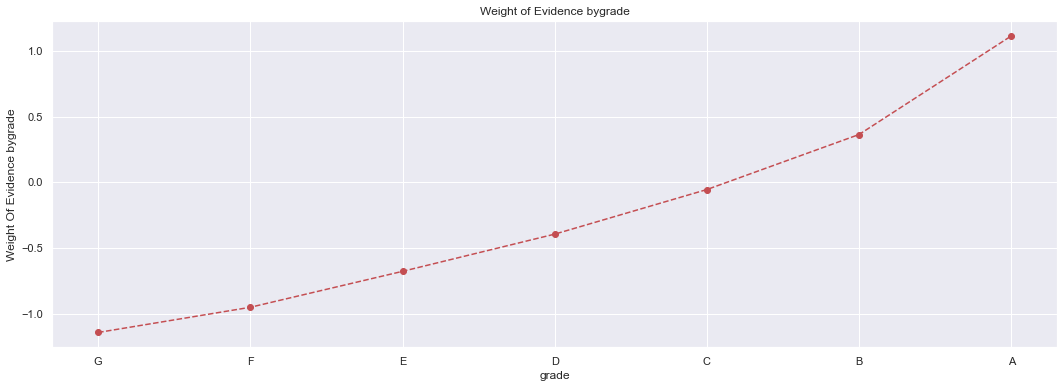

In [60]:
plot_by_woe(df_temp)

Based on weight of evidence . we must decide  how to organize the original categories of the discrete variables into dummy variables for the PD model.

In [61]:
#for home_ownership

df_home=woe_discrete(df_inputs_prepr,'home_ownership',df_targets_prepr)
df_home


,home_ownership,n_obj,prop_good,prop_n_obj,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,OTHER,182,0.791209,0.000390,144.0,38.0,0.000347,0.000746,-0.765617,NaN,NaN,inf
1,NONE,50,0.840000,0.000107,42.0,8.0,0.000101,0.000157,-0.439616,0.048791,0.326001,inf
2,RENT,188473,0.873897,0.404201,164706.0,23767.0,0.396579,0.466312,-0.161980,0.033897,0.277636,inf
3,OWN,41704,0.891737,0.089439,37189.0,4515.0,0.089544,0.088585,0.010764,0.017840,0.172744,inf
4,MORTGAGE,235875,0.904017,0.505860,213235.0,22640.0,0.513427,0.444200,0.144832,0.012280,0.134069,inf
5,ANY,1,1.000000,0.000002,1.0,0.0,0.000002,0.000000,inf,0.095983,inf,inf


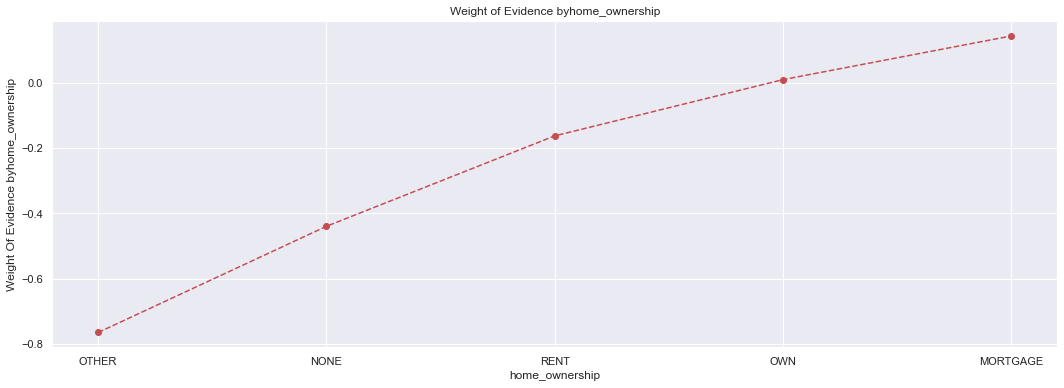

In [62]:
plot_by_woe(df_home)

In [63]:
df_inputs_prepr['addr_state'].unique()

array(['AZ', 'GA', 'IL', 'CA', 'OR', 'NC', 'TX', 'VA', 'MO', 'CT', 'UT',
       'FL', 'NY', 'PA', 'MN', 'NJ', 'KY', 'OH', 'SC', 'RI', 'LA', 'MA',
       'WA', 'WI', 'AL', 'CO', 'KS', 'NV', 'AK', 'MD', 'WV', 'VT', 'MI',
       'DC', 'SD', 'NH', 'AR', 'NM', 'MT', 'HI', 'WY', 'OK', 'DE', 'MS',
       'TN', 'IA', 'NE', 'ID', 'IN', 'ME'], dtype=object)

In [64]:
df_state=woe_discrete(df_inputs_prepr,'addr_state',df_targets_prepr)
df_state

,addr_state,n_obj,prop_good,prop_n_obj,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,NE,14,0.428571,0.000030,6.0,8.0,0.000014,0.000157,-2.385526,NaN,NaN,inf
1,IA,14,0.785714,0.000030,11.0,3.0,0.000026,0.000059,-0.798561,3.571429e-01,1.586965,inf
2,NV,6519,0.862862,0.013981,5625.0,894.0,0.013544,0.017540,-0.258574,7.714812e-02,0.539987,inf
3,HI,2487,0.873743,0.005334,2173.0,314.0,0.005232,0.006161,-0.163373,1.088106e-02,0.095201,inf
4,FL,31637,0.874640,0.067849,27671.0,3966.0,0.066626,0.077814,-0.155217,8.969866e-04,0.008156,inf
5,AL,5853,0.876474,0.012552,5130.0,723.0,0.012352,0.014185,-0.138392,1.833151e-03,0.016825,inf
6,NY,40242,0.883182,0.086303,35541.0,4701.0,0.085576,0.092234,-0.074932,6.708147e-03,0.063460,inf
7,LA,5489,0.883403,0.011772,4849.0,640.0,0.011675,0.012557,-0.072784,2.214196e-04,0.002148,inf
8,NM,2588,0.884467,0.005550,2289.0,299.0,0.005511,0.005866,-0.062417,1.063600e-03,0.010367,inf
9,OK,4117,0.884625,0.008829,3642.0,475.0,0.008769,0.009320,-0.060871,1.579570e-04,0.001547,inf


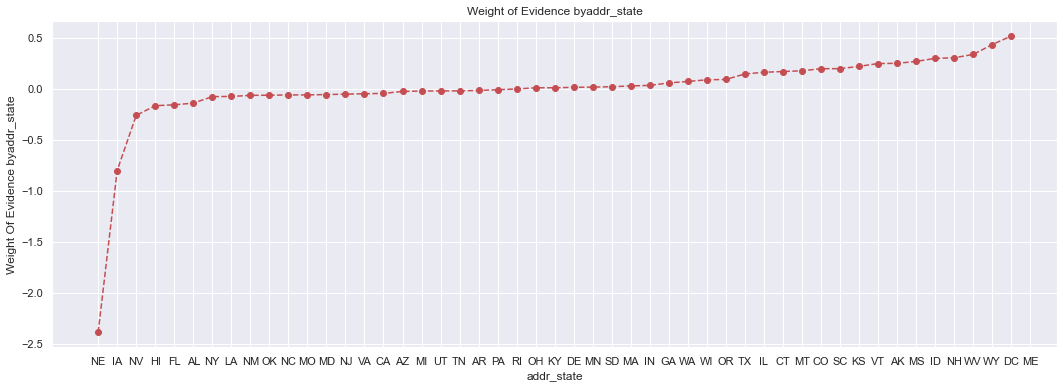

In [65]:
plot_by_woe(df_state)

In [66]:
# We create the following categories:
# 'ND' 'NE' 'IA' NV' 'FL' 'HI' 'AL'
# 'NM' 'VA'
# 'NY'
# 'OK' 'TN' 'MO' 'LA' 'MD' 'NC'
# 'CA'
# 'UT' 'KY' 'AZ' 'NJ'
# 'AR' 'MI' 'PA' 'OH' 'MN'
# 'RI' 'MA' 'DE' 'SD' 'IN'
# 'GA' 'WA' 'OR'
# 'WI' 'MT'
# 'TX'
# 'IL' 'CT'
# 'KS' 'SC' 'CO' 'VT' 'AK' 'MS'
# 'WV' 'NH' 'WY' 'DC' 'ME' 'ID'

# 'IA_NV_HI_ID_AL_FL' will be the reference category.

In [67]:
df_inputs_prepr['addr_state:ND_NE_IA_NV_FL_HI_AL'] = sum([ df_inputs_prepr['addr_state:NE'],
                                              df_inputs_prepr['addr_state:IA'], df_inputs_prepr['addr_state:NV'],
                                              df_inputs_prepr['addr_state:FL'], df_inputs_prepr['addr_state:HI'],
                                                          df_inputs_prepr['addr_state:AL']])

df_inputs_prepr['addr_state:NM_VA'] = sum([df_inputs_prepr['addr_state:NM'], df_inputs_prepr['addr_state:VA']])

df_inputs_prepr['addr_state:OK_TN_MO_LA_MD_NC'] = sum([df_inputs_prepr['addr_state:OK'], df_inputs_prepr['addr_state:TN'],
                                              df_inputs_prepr['addr_state:MO'], df_inputs_prepr['addr_state:LA'],
                                              df_inputs_prepr['addr_state:MD'], df_inputs_prepr['addr_state:NC']])

df_inputs_prepr['addr_state:UT_KY_AZ_NJ'] = sum([df_inputs_prepr['addr_state:UT'], df_inputs_prepr['addr_state:KY'],
                                              df_inputs_prepr['addr_state:AZ'], df_inputs_prepr['addr_state:NJ']])

df_inputs_prepr['addr_state:AR_MI_PA_OH_MN'] = sum([df_inputs_prepr['addr_state:AR'], df_inputs_prepr['addr_state:MI'],
                                              df_inputs_prepr['addr_state:PA'], df_inputs_prepr['addr_state:OH'],
                                              df_inputs_prepr['addr_state:MN']])

df_inputs_prepr['addr_state:RI_MA_DE_SD_IN'] = sum([df_inputs_prepr['addr_state:RI'], df_inputs_prepr['addr_state:MA'],
                                              df_inputs_prepr['addr_state:DE'], df_inputs_prepr['addr_state:SD'],
                                              df_inputs_prepr['addr_state:IN']])

df_inputs_prepr['addr_state:GA_WA_OR'] = sum([df_inputs_prepr['addr_state:GA'], df_inputs_prepr['addr_state:WA'],
                                              df_inputs_prepr['addr_state:OR']])

df_inputs_prepr['addr_state:WI_MT'] = sum([df_inputs_prepr['addr_state:WI'], df_inputs_prepr['addr_state:MT']])

df_inputs_prepr['addr_state:IL_CT'] = sum([df_inputs_prepr['addr_state:IL'], df_inputs_prepr['addr_state:CT']])

df_inputs_prepr['addr_state:KS_SC_CO_VT_AK_MS'] = sum([df_inputs_prepr['addr_state:KS'], df_inputs_prepr['addr_state:SC'],
                                              df_inputs_prepr['addr_state:CO'], df_inputs_prepr['addr_state:VT'],
                                              df_inputs_prepr['addr_state:AK'], df_inputs_prepr['addr_state:MS']])

df_inputs_prepr['addr_state:WV_NH_WY_DC_ME_ID'] = sum([df_inputs_prepr['addr_state:WV'], df_inputs_prepr['addr_state:NH'],
                                              df_inputs_prepr['addr_state:WY'], df_inputs_prepr['addr_state:DC'],
                                              df_inputs_prepr['addr_state:ME'], df_inputs_prepr['addr_state:ID']])

In [68]:
df_inputs_prepr.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,mths_since_earliest_cr_line,mths_issue_d,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,sub_grade:A1,sub_grade:A2,sub_grade:A3,sub_grade:A4,sub_grade:A5,sub_grade:B1,sub_grade:B2,sub_grade:B3,sub_grade:B4,sub_grade:B5,sub_grade:C1,sub_grade:C2,sub_grade:C3,sub_grade:C4,sub_grade:C5,sub_grade:D1,sub_grade:D2,sub_grade:D3,sub_grade:D4,sub_grade:D5,sub_grade:E1,sub_grade:E2,sub_grade:E3,sub_grade:E4,sub_grade:E5,sub_grade:F1,sub_grade:F2,sub_grade:F3,sub_grade:F4,sub_grade:F5,sub_grade:G1,sub_grade:G2,sub_grade:G3,sub_grade:G4,sub_grade:G5,home_ownership:ANY,home_ownership:MORTGAGE,home_ownership:NONE,home_ownership:OTHER,home_ownership:OWN,home_ownership:RENT,verification_status:Not Verified,verification_status:Source Verified,verification_status:Verified,loan_status:Charged Off,loan_status:Current,loan_status:Default,loan_status:Does not meet the credit policy. Status:Charged Off,loan_status:Does not meet the credit policy. Status:Fully Paid,loan_status:Fully Paid,loan_status:In Grace Period,loan_status:Late (16-30 days),loan_status:Late (31-120 days),purpose:car,purpose:credit_card,purpose:debt_consolidation,purpose:educational,purpose:home_improvement,purpose:house,purpose:major_purchase,purpose:medical,purpose:moving,purpose:other,purpose:renewable_energy,purpose:small_business,purpose:vacation,purpose:wedding,addr_state:AK,addr_state:AL,addr_state:AR,addr_state:AZ,addr_state:CA,addr_state:CO,addr_state:CT,addr_state:DC,addr_state:DE,addr_state:FL,addr_state:GA,addr_state:HI,addr_state:IA,addr_state:ID,addr_state:IL,addr_state:IN,addr_state:KS,addr_state:KY,addr_state:LA,addr_state:MA,addr_state:MD,addr_state:ME,addr_state:MI,addr_state:MN,addr_state:MO,addr_state:MS,addr_state:MT,addr_state:NC,addr_state:NE,addr_state:NH,addr_state:NJ,addr_state:NM,addr_state:NV,addr_state:NY,addr_state:OH,addr_state:OK,addr_state:OR,addr_state:PA,addr_state:RI,addr_state:SC,addr_state:SD,addr_state:TN,addr_state:TX,addr_state:UT,addr_state:VA,addr_state:VT,addr_state:WA,addr_state:WI,addr_state:WV,addr_state:WY,initial_list_status:f,initial_list_status:w,addr_state:ND_NE_IA_NV_FL_HI_AL,addr_state:NM_VA,addr_state:OK_TN_MO_LA_MD_NC,addr_state:UT_KY_AZ_NJ,addr_state:AR_MI_PA_OH_MN,addr_state:RI_MA_DE_SD_IN,addr_state:GA_WA_OR,addr_state:WI_MT,addr_state:IL_CT,addr_state:KS_SC_CO_VT_AK_MS,addr_state:WV_NH_WY_DC_ME_ID
0,0,1077501,1296599,5000,5000,4975.0,36,10.65,162.87,B,B2,NaN,10,RENT,24000.0,Verified,2011-12-01,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,1985-01-01,1.0,NaN,NaN,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-15,171.62,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5000.0,NaN,NaN,NaN,431.0,108.0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [69]:
# 'verification_status'
df_temp = woe_discrete(df_inputs_prepr, 'verification_status', df_targets_prepr)
# We calculate weight of evidence.
df_temp

,verification_status,n_obj,prop_good,prop_n_obj,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,Verified,168055,0.872631,0.360413,146650.0,21405.0,0.353104,0.419969,-0.173420,NaN,NaN,0.020831
1,Source Verified,149993,0.895882,0.321677,134376.0,15617.0,0.323550,0.306408,0.054438,0.023251,0.227858,0.020831
2,Not Verified,148237,0.905921,0.317911,134291.0,13946.0,0.323346,0.273623,0.166972,0.010039,0.112535,0.020831


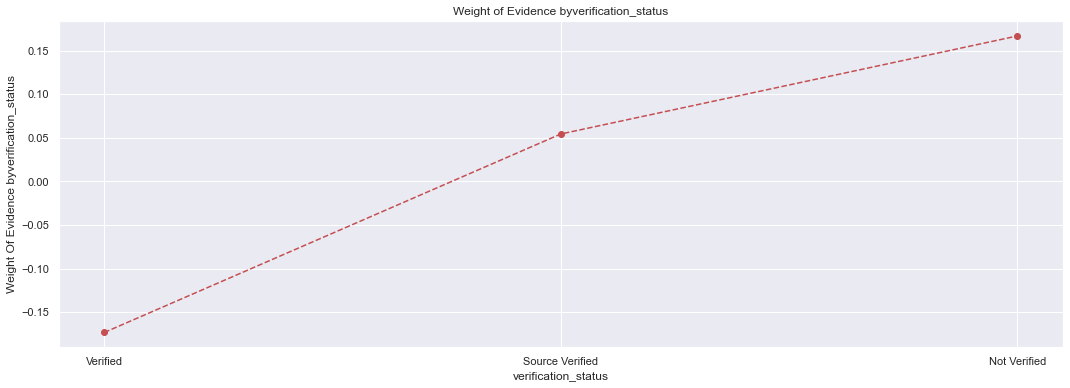

In [70]:
plot_by_woe(df_temp)
# We plot the weight of evidence values.

In [71]:
# 'purpose'
df_temp = woe_discrete(df_inputs_prepr, 'purpose', df_targets_prepr)
# We calculate weight of evidence.
df_temp

,purpose,n_obj,prop_good,prop_n_obj,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,small_business,7013,0.784258,0.015040,5500.0,1513.0,0.013243,0.029685,-0.807190,NaN,NaN,0.03698
1,educational,422,0.791469,0.000905,334.0,88.0,0.000804,0.001727,-0.764040,0.007211,0.043151,0.03698
2,renewable_energy,351,0.846154,0.000753,297.0,54.0,0.000715,0.001059,-0.393096,0.054685,0.370944,0.03698
3,moving,2994,0.847361,0.006421,2537.0,457.0,0.006109,0.008966,-0.383790,0.001208,0.009306,0.03698
4,house,2269,0.859850,0.004866,1951.0,318.0,0.004698,0.006239,-0.283798,0.012489,0.099992,0.03698
5,other,23690,0.862009,0.050806,20421.0,3269.0,0.049170,0.064138,-0.265764,0.002159,0.018034,0.03698
6,medical,4602,0.866145,0.009870,3986.0,616.0,0.009597,0.012086,-0.230548,0.004136,0.035217,0.03698
7,wedding,2343,0.878361,0.005025,2058.0,285.0,0.004955,0.005592,-0.120843,0.012216,0.109704,0.03698
8,vacation,2487,0.882187,0.005334,2194.0,293.0,0.005283,0.005749,-0.084535,0.003826,0.036308,0.03698
9,debt_consolidation,274195,0.886690,0.588042,243126.0,31069.0,0.585399,0.609579,-0.040475,0.004503,0.044060,0.03698


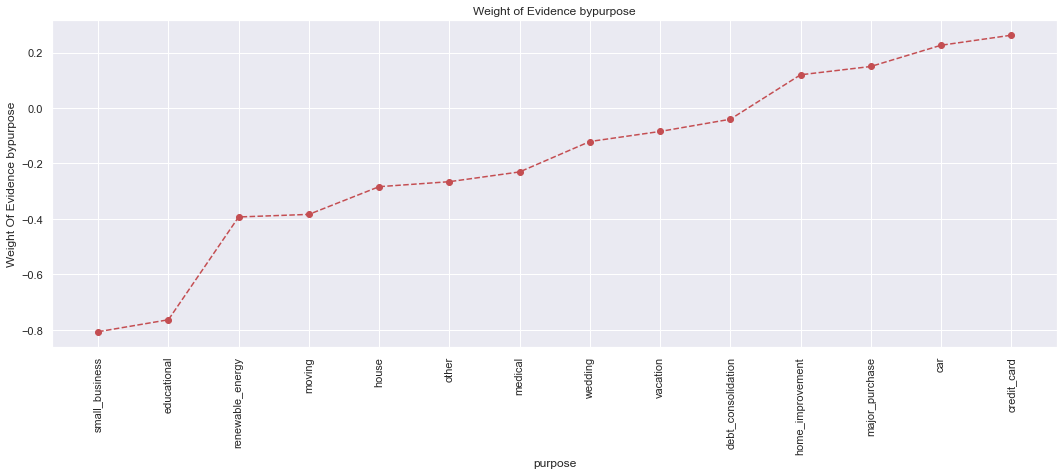

In [72]:
plot_by_woe(df_temp, 90)
# We plot the weight of evidence values.

In [73]:
# We combine 'educational', 'small_business', 'wedding', 'renewable_energy', 'moving', 'house' in one category: 'educ__sm_b__wedd__ren_en__mov__house'.
# We combine 'other', 'medical', 'vacation' in one category: 'oth__med__vacation'.
# We combine 'major_purchase', 'car', 'home_improvement' in one category: 'major_purch__car__home_impr'.
# We leave 'debt_consolidtion' in a separate category.
# We leave 'credit_card' in a separate category.
# 'educ__sm_b__wedd__ren_en__mov__house' will be the reference category.
df_inputs_prepr['purpose:educ__sm_b__wedd__ren_en__mov__house'] = sum([df_inputs_prepr['purpose:educational'], df_inputs_prepr['purpose:small_business'],
                                                                 df_inputs_prepr['purpose:wedding'], df_inputs_prepr['purpose:renewable_energy'],
                                                                 df_inputs_prepr['purpose:moving'], df_inputs_prepr['purpose:house']])
df_inputs_prepr['purpose:oth__med__vacation'] = sum([df_inputs_prepr['purpose:other'], df_inputs_prepr['purpose:medical'],
                                             df_inputs_prepr['purpose:vacation']])
df_inputs_prepr['purpose:major_purch__car__home_impr'] = sum([df_inputs_prepr['purpose:major_purchase'], df_inputs_prepr['purpose:car'],
                                                        df_inputs_prepr['purpose:home_improvement']])

In [74]:
# 'initial_list_status'
df_temp = woe_discrete(df_inputs_prepr, 'initial_list_status', df_targets_prepr)
df_temp

,initial_list_status,n_obj,prop_good,prop_n_obj,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,f,303005,0.879692,0.649828,266551.0,36454.0,0.641801,0.715233,-0.108330,NaN,NaN,0.024801
1,w,163280,0.911110,0.350172,148766.0,14514.0,0.358199,0.284767,0.229417,0.031418,0.337746,0.024801


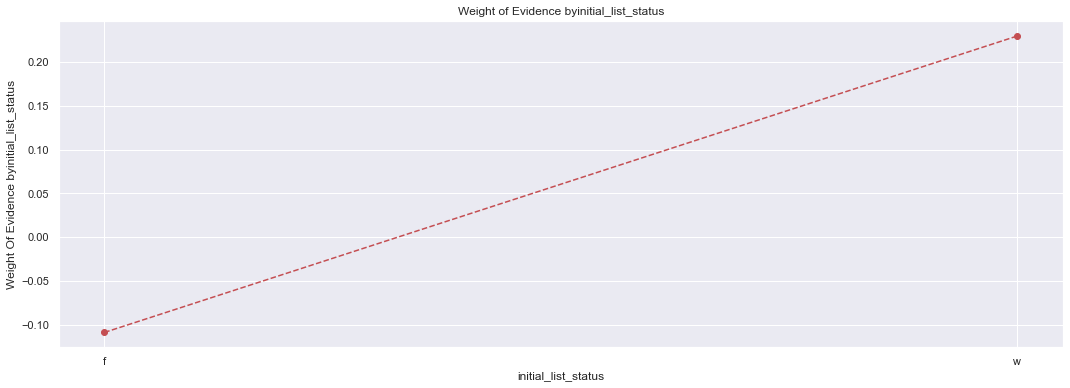

In [75]:
plot_by_woe(df_temp)
# We plot the weight of evidence values.

preprocessing on Continuous Variables

In [76]:
def woe_ordered_continous(df1,descrete_variable_name,good_bad_variable_df):
    df1=pd.concat([df_targets_prepr,df_inputs_prepr[descrete_variable_name]],axis=1)
    df1=pd.concat([df1.groupby(descrete_variable_name,as_index=False)['good_bad'].count(),df1.groupby(descrete_variable_name,as_index=False)['good_bad'].mean()],axis=1)
    df1=df1.iloc[:,[0,1,3]]
    df1.columns=[df1.columns.values[0],'n_obj','prop_good']
    df1['prop_n_obj']=df1['n_obj'] / df1['n_obj'].sum()
    df1['n_good']=df1['prop_good']*df1['n_obj']
    df1['n_bad']=(1-df1['prop_good'])*df1['n_obj']
    df1['prop_n_good']=df1['n_good']/df1['n_good'].sum()
    df1['prop_n_bad']=df1['n_bad']/df1['n_bad'].sum()
    df1['WoE']=np.log(df1['prop_n_good']/df1['prop_n_bad'])
    #df1=df1.sort_values(['WoE'])
    #df1=df1.reset_index(drop=True)
    df1['diff_prop_good']=df1['prop_good'].diff().abs()
    df1['diff_WoE']=df1['WoE'].diff().abs()
    df1['IV']=(df1['prop_n_good']-df1['prop_n_bad'])*df1['WoE']
    df1['IV']=df1['IV'].sum()
    return df1

In [77]:
#term_int
df_inputs_prepr['term'].unique()

array([36, 60], dtype=int64)

In [78]:
df_temp=woe_ordered_continous(df_inputs_prepr,'term',df_targets_prepr)
df_temp

,term,n_obj,prop_good,prop_n_obj,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,36,337953,0.902915,0.724778,305143.0,32810.0,0.734723,0.643737,0.132203,NaN,NaN,0.03886
1,60,128332,0.858508,0.275222,110174.0,18158.0,0.265277,0.356263,-0.294894,0.044408,0.427097,0.03886


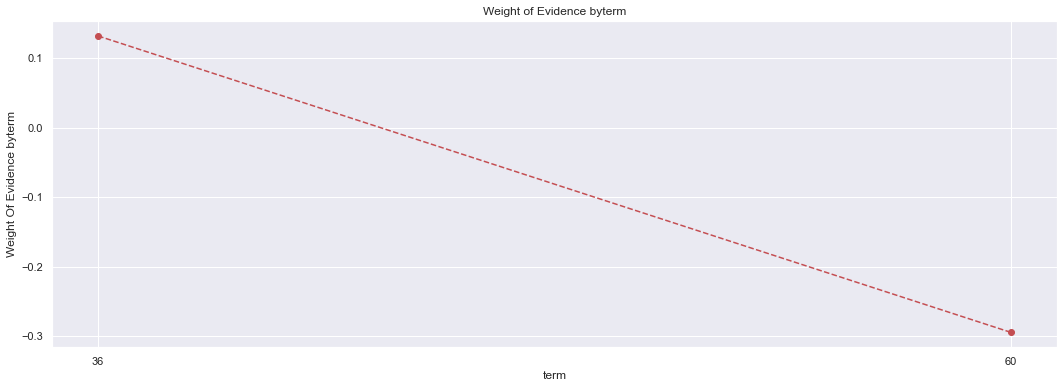

In [79]:
plot_by_woe(df_temp) #so it seems that 60 months loan is much riskier than 36 months

In [80]:
df_inputs_prepr['term:36']=np.where(df_inputs_prepr['term']==36,1,0)

In [81]:
df_inputs_prepr['term:60']=np.where(df_inputs_prepr['term']==60,1,0)

In [82]:
#emp_length 
df_inputs_prepr['emp_length'].unique()

array([10,  0,  1,  3,  8,  9,  4,  5,  6,  2,  7], dtype=int64)

In [83]:
df_temp=woe_ordered_continous(df_inputs_prepr,'emp_length',df_targets_prepr)
df_temp

,emp_length,n_obj,prop_good,prop_n_obj,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,0,57273,0.876015,0.122828,50172.0,7101.0,0.120804,0.139323,-0.142623,NaN,NaN,0.006611
1,1,29622,0.888124,0.063528,26308.0,3314.0,0.063344,0.065021,-0.026127,0.012109,0.116496,0.006611
2,2,41373,0.890242,0.088729,36832.0,4541.0,0.088684,0.089095,-0.004624,0.002119,0.021503,0.006611
3,3,36596,0.890480,0.078484,32588.0,4008.0,0.078465,0.078638,-0.002192,0.000237,0.002432,0.006611
4,4,28023,0.890411,0.060098,24952.0,3071.0,0.060079,0.060253,-0.002893,0.000068,0.000701,0.006611
5,5,30774,0.885033,0.065998,27236.0,3538.0,0.065579,0.069416,-0.056866,0.005379,0.053973,0.006611
6,6,26112,0.882889,0.056000,23054.0,3058.0,0.055509,0.059998,-0.077766,0.002144,0.020900,0.006611
7,7,26180,0.888655,0.056146,23265.0,2915.0,0.056017,0.057193,-0.020764,0.005766,0.057002,0.006611
8,8,22395,0.889931,0.048029,19930.0,2465.0,0.047987,0.048364,-0.007810,0.001275,0.012954,0.006611
9,9,17888,0.887914,0.038363,15883.0,2005.0,0.038243,0.039338,-0.028239,0.002017,0.020429,0.006611


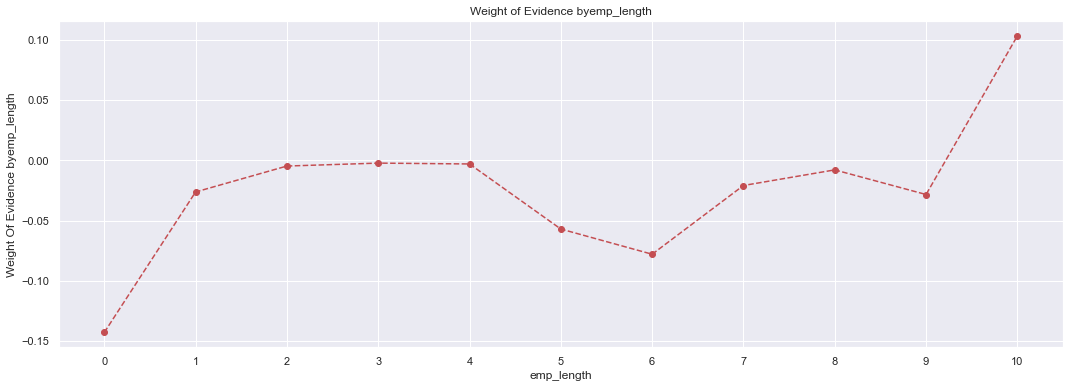

In [84]:
plot_by_woe(df_temp)

In [85]:
df_inputs_prepr['emp_length:0']=np.where(df_inputs_prepr['emp_length'].isin([0]),1,0)
df_inputs_prepr['emp_length:1']=np.where(df_inputs_prepr['emp_length'].isin([1]),1,0)
df_inputs_prepr['emp_length:2-4']=np.where(df_inputs_prepr['emp_length'].isin([2,3,4]),1,0)
df_inputs_prepr['emp_length:5-6']=np.where(df_inputs_prepr['emp_length'].isin([5,6]),1,0)
df_inputs_prepr['emp_length:7-9']=np.where(df_inputs_prepr['emp_length'].isin([7,8,9]),1,0)
df_inputs_prepr['emp_length:10']=np.where(df_inputs_prepr['emp_length'].isin([10]),1,0)


In [87]:
df_inputs_prepr['mths_issue_d'].unique()

array([108., 109., 110., 111., 112., 113., 114., 115., 116., 117., 118.,
       119., 120., 121., 122., 123., 124., 125., 126., 127., 128., 129.,
       130., 131., 132., 133., 134., 135., 136., 137., 138., 139., 140.,
       141., 142., 143., 144., 145., 146., 147., 148., 149., 150., 151.,
       152., 153., 154., 155., 156., 157., 158., 159., 160., 161., 162.,
        84.,  85.,  86.,  87.,  88.,  89.,  90.,  91.,  92.,  93.,  94.,
        95.,  96.,  97.,  98.,  99., 100., 101., 102., 103., 104., 105.,
       106., 107.,  72.,  73.,  74.,  75.,  76.,  77.,  78.,  79.,  80.,
        81.,  82.,  83.])

In [88]:
df_inputs_prepr['mths_since_issue_d_factor']=pd.cut(df_inputs_prepr['mths_issue_d'],50)


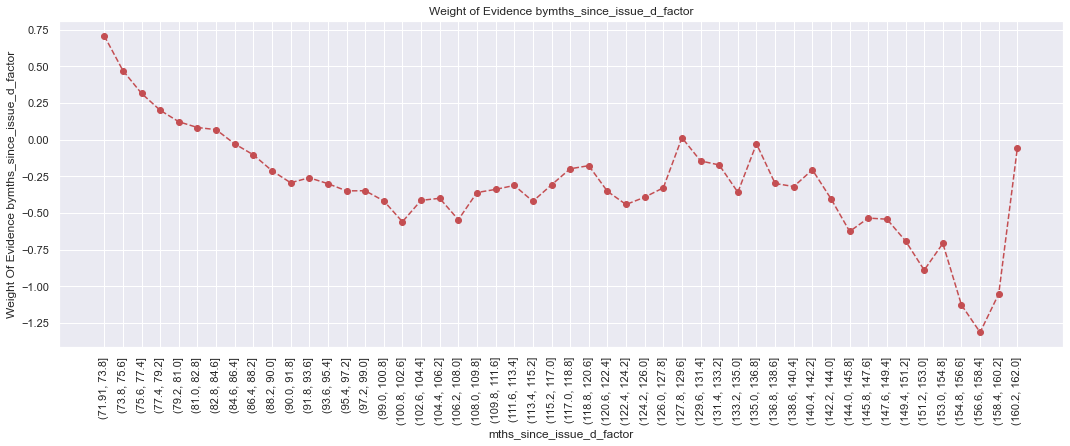

In [89]:
df_temp=woe_ordered_continous(df_inputs_prepr,'mths_since_issue_d_factor',df_targets_prepr)
plot_by_woe(df_temp,90)

In [92]:
# We create the following categories:
# < 38, 38 - 39, 40 - 41, 42 - 48, 49 - 52, 53 - 64, 65 - 84, > 84.
df_inputs_prepr['mths_since_issue_d:<38'] = np.where(df_inputs_prepr['mths_issue_d'].isin(range(38)), 1, 0)
df_inputs_prepr['mths_since_issue_d:38-39'] = np.where(df_inputs_prepr['mths_issue_d'].isin(range(38, 40)), 1, 0)
df_inputs_prepr['mths_since_issue_d:40-41'] = np.where(df_inputs_prepr['mths_issue_d'].isin(range(40, 42)), 1, 0)
df_inputs_prepr['mths_since_issue_d:42-48'] = np.where(df_inputs_prepr['mths_issue_d'].isin(range(42, 49)), 1, 0)
df_inputs_prepr['mths_since_issue_d:49-52'] = np.where(df_inputs_prepr['mths_issue_d'].isin(range(49, 53)), 1, 0)
df_inputs_prepr['mths_since_issue_d:53-64'] = np.where(df_inputs_prepr['mths_issue_d'].isin(range(53, 65)), 1, 0)
df_inputs_prepr['mths_since_issue_d:65-84'] = np.where(df_inputs_prepr['mths_issue_d'].isin(range(65, 85)), 1, 0)
df_inputs_prepr['mths_since_issue_d:>84'] = np.where(df_inputs_prepr['mths_issue_d'].isin(range(85, int(df_inputs_prepr['mths_issue_d'].max()))), 1, 0)

In [93]:
# int_rate
df_inputs_prepr['int_rate_factor'] = pd.cut(df_inputs_prepr['int_rate'], 50)
# Here we do fine-classing: using the 'cut' method, we split the variable into 50 categories by its values.

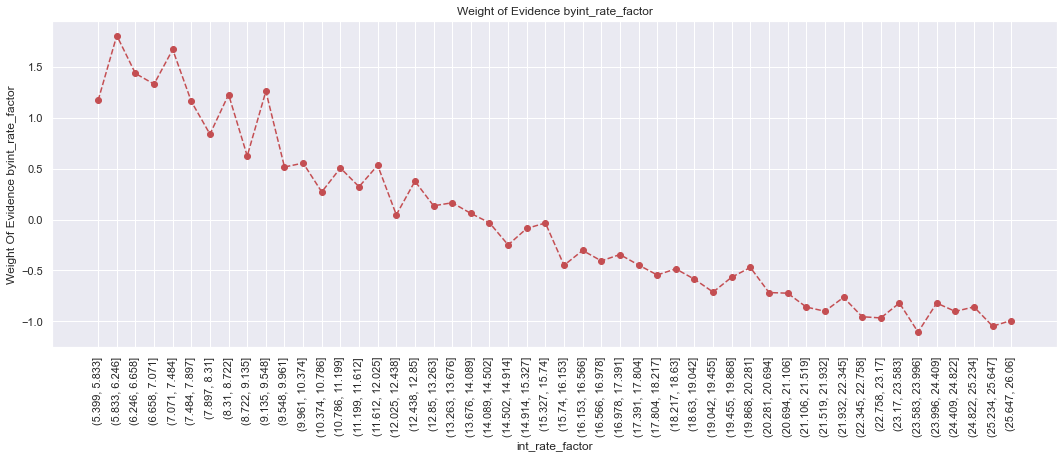

In [97]:
df_temp = woe_ordered_continous(df_inputs_prepr, 'int_rate_factor', df_targets_prepr)
# We calculate weight of evidence.
plot_by_woe(df_temp, 90)


In [98]:
# '< 9.548', '9.548 - 12.025', '12.025 - 15.74', '15.74 - 20.281', '> 20.281'
df_inputs_prepr['int_rate:<9.548'] = np.where((df_inputs_prepr['int_rate'] <= 9.548), 1, 0)
df_inputs_prepr['int_rate:9.548-12.025'] = np.where((df_inputs_prepr['int_rate'] > 9.548) & (df_inputs_prepr['int_rate'] <= 12.025), 1, 0)
df_inputs_prepr['int_rate:12.025-15.74'] = np.where((df_inputs_prepr['int_rate'] > 12.025) & (df_inputs_prepr['int_rate'] <= 15.74), 1, 0)
df_inputs_prepr['int_rate:15.74-20.281'] = np.where((df_inputs_prepr['int_rate'] > 15.74) & (df_inputs_prepr['int_rate'] <= 20.281), 1, 0)
df_inputs_prepr['int_rate:>20.281'] = np.where((df_inputs_prepr['int_rate'] > 20.281), 1, 0)

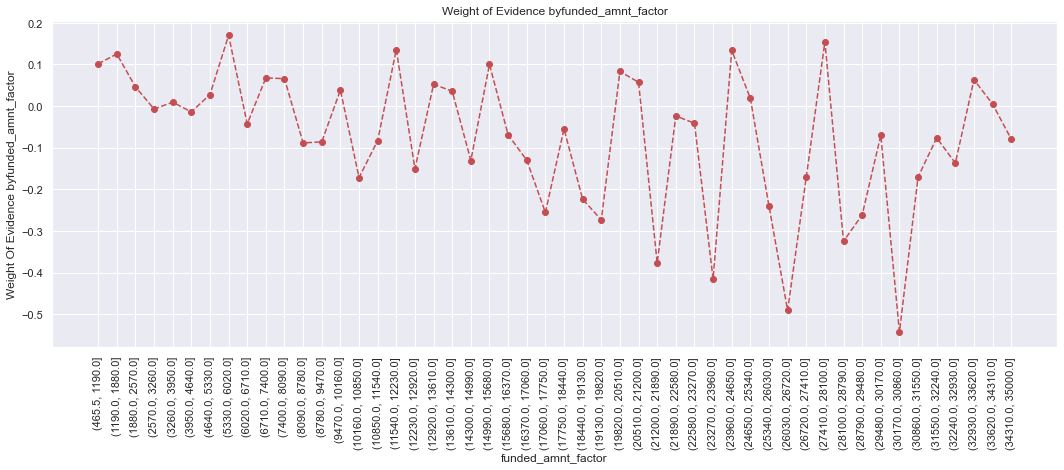

In [100]:
# funded_amnt
df_inputs_prepr['funded_amnt_factor'] = pd.cut(df_inputs_prepr['funded_amnt'], 50)
# Here we do fine-classing: using the 'cut' method, we split the variable into 50 categories by its values.
df_temp = woe_ordered_continous(df_inputs_prepr, 'funded_amnt_factor', df_targets_prepr)
# We calculate weight of evidence.
plot_by_woe(df_temp, 90)
# We plot the weight of evidence values.

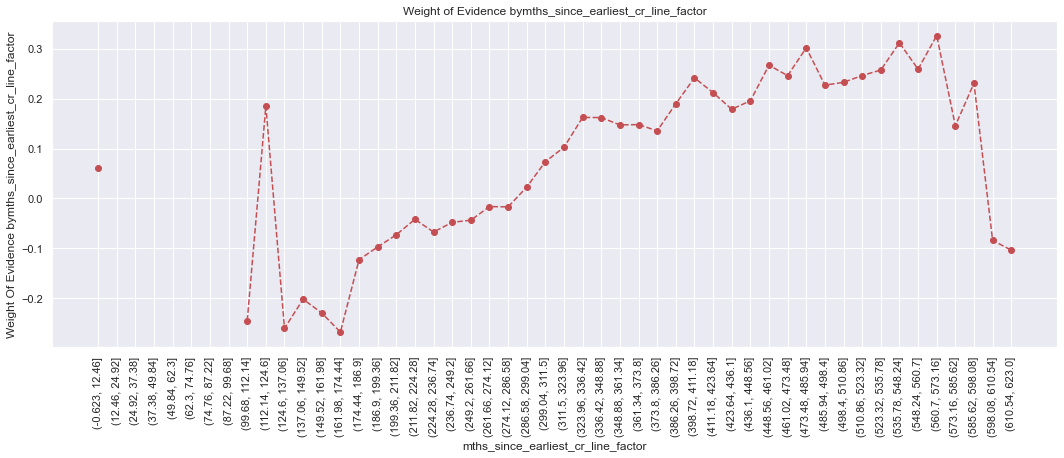

In [101]:
# mths_since_earliest_cr_line
df_inputs_prepr['mths_since_earliest_cr_line_factor'] = pd.cut(df_inputs_prepr['mths_since_earliest_cr_line'], 50)
# Here we do fine-classing: using the 'cut' method, we split the variable into 50 categories by its values.
df_temp = woe_ordered_continous(df_inputs_prepr, 'mths_since_earliest_cr_line_factor', df_targets_prepr)
# We calculate weight of evidence.
plot_by_woe(df_temp, 90)
# We plot the weight of evidence values.

In [102]:
# We create the following categories:
# < 140, # 141 - 164, # 165 - 247, # 248 - 270, # 271 - 352, # > 352
df_inputs_prepr['mths_since_earliest_cr_line:<140'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(140)), 1, 0)
df_inputs_prepr['mths_since_earliest_cr_line:141-164'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(140, 165)), 1, 0)
df_inputs_prepr['mths_since_earliest_cr_line:165-247'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(165, 248)), 1, 0)
df_inputs_prepr['mths_since_earliest_cr_line:248-270'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(248, 271)), 1, 0)
df_inputs_prepr['mths_since_earliest_cr_line:271-352'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(271, 353)), 1, 0)
df_inputs_prepr['mths_since_earliest_cr_line:>352'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(353, int(df_inputs_prepr['mths_since_earliest_cr_line'].max()))), 1, 0)

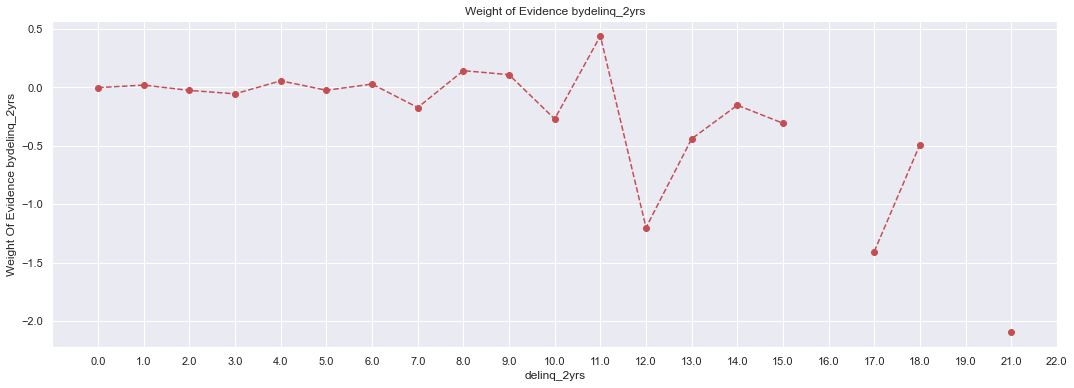

In [104]:
# delinq_2yrs
df_temp = woe_ordered_continous(df_inputs_prepr, 'delinq_2yrs', df_targets_prepr)
# We calculate weight of evidence.
plot_by_woe(df_temp)
# We plot the weight of evidence values

In [105]:
# Categories: 0, 1-3, >=4
df_inputs_prepr['delinq_2yrs:0'] = np.where((df_inputs_prepr['delinq_2yrs'] == 0), 1, 0)
df_inputs_prepr['delinq_2yrs:1-3'] = np.where((df_inputs_prepr['delinq_2yrs'] >= 1) & (df_inputs_prepr['delinq_2yrs'] <= 3), 1, 0)
df_inputs_prepr['delinq_2yrs:>=4'] = np.where((df_inputs_prepr['delinq_2yrs'] >= 9), 1, 0)

C:\Users\HP\anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


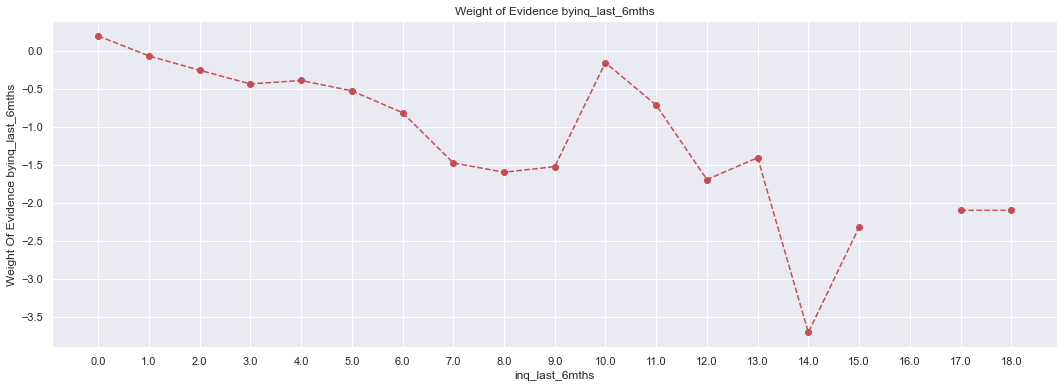

In [106]:
# inq_last_6mths
df_temp = woe_ordered_continous(df_inputs_prepr, 'inq_last_6mths', df_targets_prepr)
# We calculate weight of evidence.
df_temp
plot_by_woe(df_temp)
# We plot the weight of evidence values.

In [107]:
# Categories: 0, 1 - 2, 3 - 6, > 6
df_inputs_prepr['inq_last_6mths:0'] = np.where((df_inputs_prepr['inq_last_6mths'] == 0), 1, 0)
df_inputs_prepr['inq_last_6mths:1-2'] = np.where((df_inputs_prepr['inq_last_6mths'] >= 1) & (df_inputs_prepr['inq_last_6mths'] <= 2), 1, 0)
df_inputs_prepr['inq_last_6mths:3-6'] = np.where((df_inputs_prepr['inq_last_6mths'] >= 3) & (df_inputs_prepr['inq_last_6mths'] <= 6), 1, 0)
df_inputs_prepr['inq_last_6mths:>6'] = np.where((df_inputs_prepr['inq_last_6mths'] > 6), 1, 0)

C:\Users\HP\anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


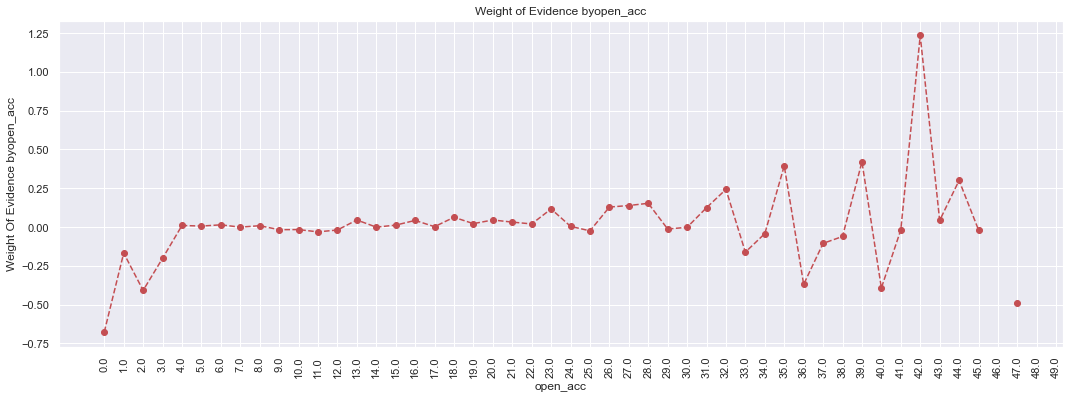

In [108]:
# open_acc
df_temp = woe_ordered_continous(df_inputs_prepr, 'open_acc', df_targets_prepr)
# We calculate weight of evidence.
df_temp
plot_by_woe(df_temp, 90)
# We plot the weight of evidence values.

In [109]:
# Categories: '0', '1-3', '4-12', '13-17', '18-22', '23-25', '26-30', '>30'
df_inputs_prepr['open_acc:0'] = np.where((df_inputs_prepr['open_acc'] == 0), 1, 0)
df_inputs_prepr['open_acc:1-3'] = np.where((df_inputs_prepr['open_acc'] >= 1) & (df_inputs_prepr['open_acc'] <= 3), 1, 0)
df_inputs_prepr['open_acc:4-12'] = np.where((df_inputs_prepr['open_acc'] >= 4) & (df_inputs_prepr['open_acc'] <= 12), 1, 0)
df_inputs_prepr['open_acc:13-17'] = np.where((df_inputs_prepr['open_acc'] >= 13) & (df_inputs_prepr['open_acc'] <= 17), 1, 0)
df_inputs_prepr['open_acc:18-22'] = np.where((df_inputs_prepr['open_acc'] >= 18) & (df_inputs_prepr['open_acc'] <= 22), 1, 0)
df_inputs_prepr['open_acc:23-25'] = np.where((df_inputs_prepr['open_acc'] >= 23) & (df_inputs_prepr['open_acc'] <= 25), 1, 0)
df_inputs_prepr['open_acc:26-30'] = np.where((df_inputs_prepr['open_acc'] >= 26) & (df_inputs_prepr['open_acc'] <= 30), 1, 0)
df_inputs_prepr['open_acc:>=31'] = np.where((df_inputs_prepr['open_acc'] >= 31), 1, 0)

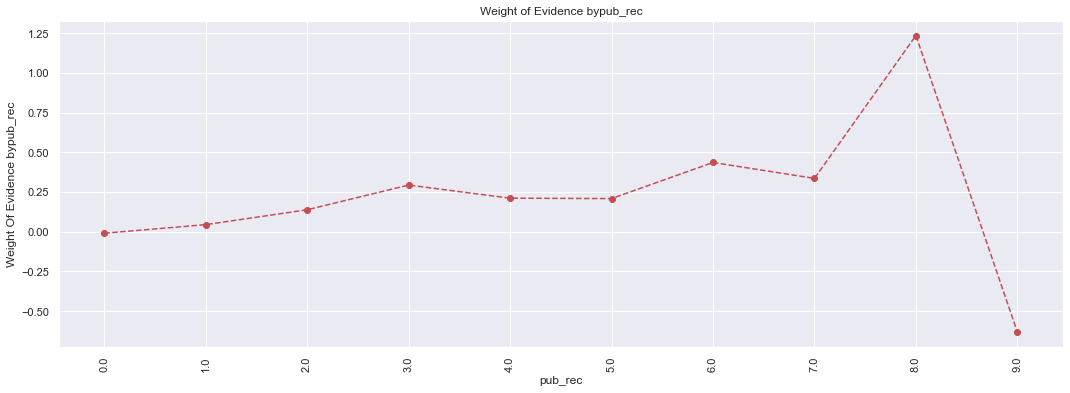

In [110]:
# pub_rec
df_temp = woe_ordered_continous(df_inputs_prepr, 'pub_rec', df_targets_prepr)
# We calculate weight of evidence.
df_temp
plot_by_woe(df_temp, 90)
# We plot the weight of evidence values.

In [111]:
# Categories '0-2', '3-4', '>=5'
df_inputs_prepr['pub_rec:0-2'] = np.where((df_inputs_prepr['pub_rec'] >= 0) & (df_inputs_prepr['pub_rec'] <= 2), 1, 0)
df_inputs_prepr['pub_rec:3-4'] = np.where((df_inputs_prepr['pub_rec'] >= 3) & (df_inputs_prepr['pub_rec'] <= 4), 1, 0)
df_inputs_prepr['pub_rec:>=5'] = np.where((df_inputs_prepr['pub_rec'] >= 5), 1, 0)


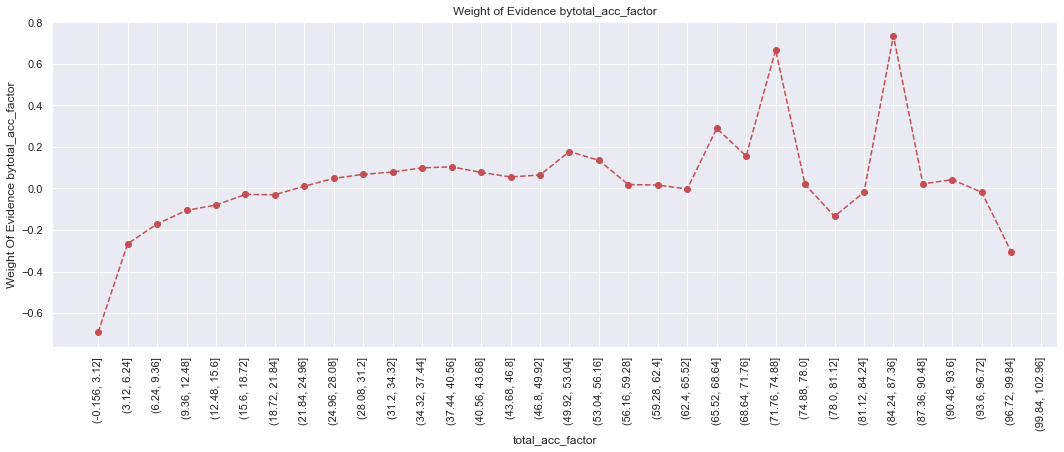

In [112]:
# total_acc
df_inputs_prepr['total_acc_factor'] = pd.cut(df_inputs_prepr['total_acc'], 50)
# Here we do fine-classing: using the 'cut' method, we split the variable into 50 categories by its values.
df_temp = woe_ordered_continous(df_inputs_prepr, 'total_acc_factor', df_targets_prepr)
# We calculate weight of evidence.
df_temp
plot_by_woe(df_temp, 90)
# We plot the weight of evidence values.

In [113]:
# Categories: '<=27', '28-51', '>51'
df_inputs_prepr['total_acc:<=27'] = np.where((df_inputs_prepr['total_acc'] <= 27), 1, 0)
df_inputs_prepr['total_acc:28-51'] = np.where((df_inputs_prepr['total_acc'] >= 28) & (df_inputs_prepr['total_acc'] <= 51), 1, 0)
df_inputs_prepr['total_acc:>=52'] = np.where((df_inputs_prepr['total_acc'] >= 52), 1, 0)

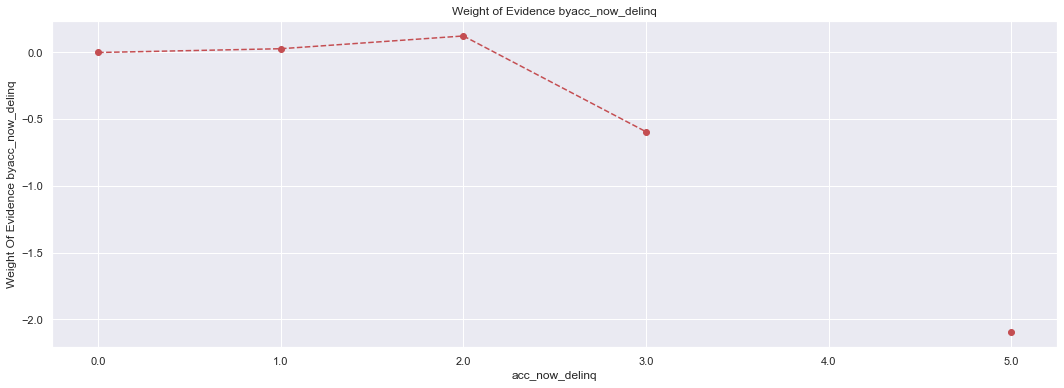

In [114]:
# acc_now_delinq
df_temp = woe_ordered_continous(df_inputs_prepr, 'acc_now_delinq', df_targets_prepr)
# We calculate weight of evidence.
df_temp
plot_by_woe(df_temp)
# We plot the weight of evidence values.

In [115]:
# Categories: '0', '>=1'
df_inputs_prepr['acc_now_delinq:0'] = np.where((df_inputs_prepr['acc_now_delinq'] == 0), 1, 0)
df_inputs_prepr['acc_now_delinq:>=1'] = np.where((df_inputs_prepr['acc_now_delinq'] >= 1), 1, 0)

C:\Users\HP\anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


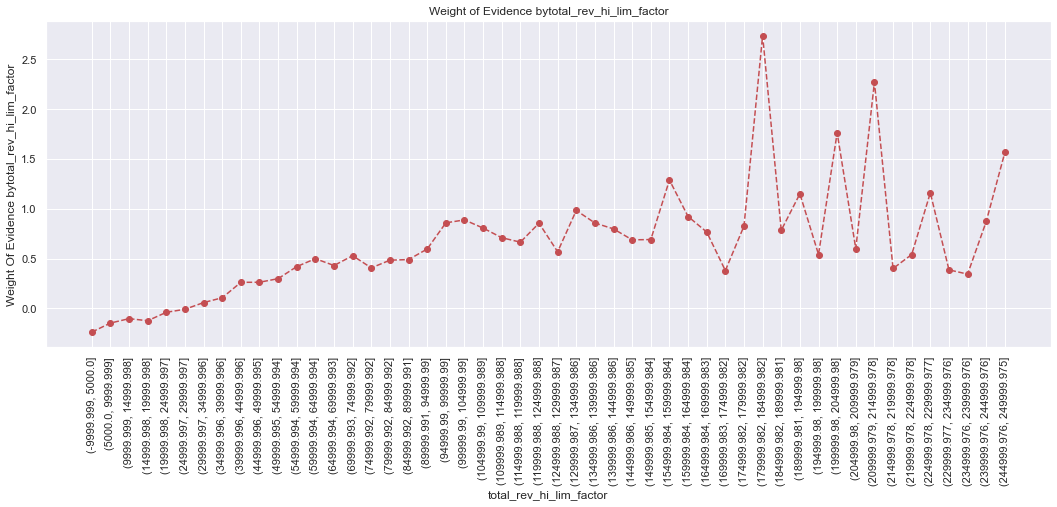

In [116]:
# total_rev_hi_lim
df_inputs_prepr['total_rev_hi_lim_factor'] = pd.cut(df_inputs_prepr['total_rev_hi_lim'], 2000)
# Here we do fine-classing: using the 'cut' method, we split the variable into 2000 categories by its values.
df_temp = woe_ordered_continous(df_inputs_prepr, 'total_rev_hi_lim_factor', df_targets_prepr)
# We calculate weight of evidence.
plot_by_woe(df_temp.iloc[: 50, : ], 90)
# We plot the weight of evidence values.

In [117]:
# Categories
# '<=5K', '5K-10K', '10K-20K', '20K-30K', '30K-40K', '40K-55K', '55K-95K', '>95K'
df_inputs_prepr['total_rev_hi_lim:<=5K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] <= 5000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:5K-10K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 5000) & (df_inputs_prepr['total_rev_hi_lim'] <= 10000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:10K-20K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 10000) & (df_inputs_prepr['total_rev_hi_lim'] <= 20000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:20K-30K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 20000) & (df_inputs_prepr['total_rev_hi_lim'] <= 30000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:30K-40K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 30000) & (df_inputs_prepr['total_rev_hi_lim'] <= 40000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:40K-55K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 40000) & (df_inputs_prepr['total_rev_hi_lim'] <= 55000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:55K-95K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 55000) & (df_inputs_prepr['total_rev_hi_lim'] <= 95000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:>95K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 95000), 1, 0)

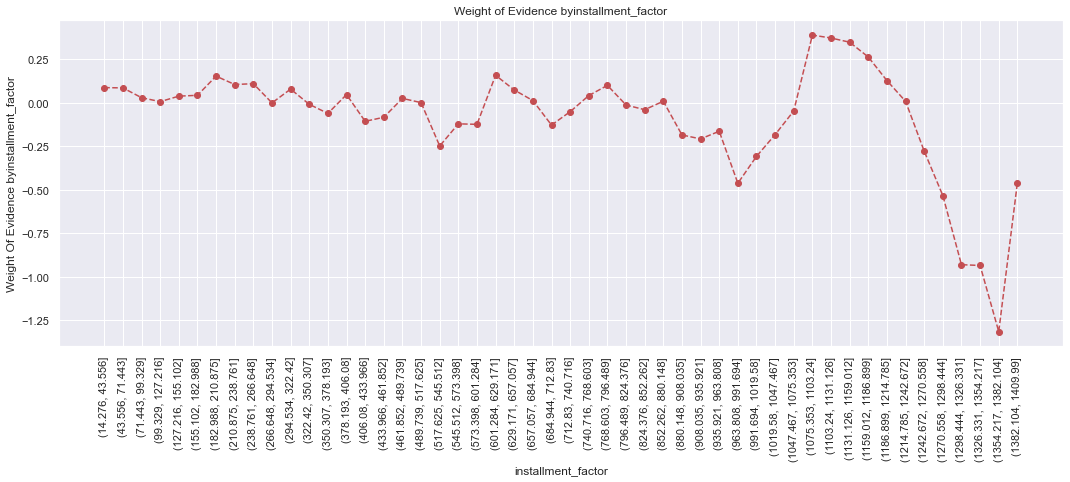

In [118]:
# installment
df_inputs_prepr['installment_factor'] = pd.cut(df_inputs_prepr['installment'], 50)
# Here we do fine-classing: using the 'cut' method, we split the variable into 50 categories by its values.
df_temp = woe_ordered_continous(df_inputs_prepr, 'installment_factor', df_targets_prepr)
# We calculate weight of evidence.
df_temp
plot_by_woe(df_temp, 90)
# We plot the weight of evidence values.

In [119]:
# annual_inc
df_inputs_prepr['annual_inc_factor'] = pd.cut(df_inputs_prepr['annual_inc'], 50)
# Here we do fine-classing: using the 'cut' method, we split the variable into 50 categories by its values.
df_temp = woe_ordered_continous(df_inputs_prepr, 'annual_inc_factor', df_targets_prepr)
# We calculate weight of evidence.
df_temp

,annual_inc_factor,n_obj,prop_good,prop_n_obj,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-5602.104, 151858.08]",445843,0.888999,0.956160,396354.0,49489.0,0.954341,0.970982,-0.017287,NaN,NaN,inf
1,"(151858.08, 301820.16]",18425,0.926947,0.039514,17079.0,1346.0,0.041123,0.026409,0.442868,0.037948,0.460155,inf
2,"(301820.16, 451782.24]",1368,0.933480,0.002934,1277.0,91.0,0.003075,0.001785,0.543565,0.006532,0.100697,inf
3,"(451782.24, 601744.32]",372,0.940860,0.000798,350.0,22.0,0.000843,0.000432,0.669047,0.007381,0.125481,inf
4,"(601744.32, 751706.4]",115,0.904348,0.000247,104.0,11.0,0.000250,0.000216,0.148652,0.036512,0.520395,inf
5,"(751706.4, 901668.48]",73,0.904110,0.000157,66.0,7.0,0.000159,0.000137,0.145900,0.000238,0.002751,inf
6,"(901668.48, 1051630.56]",33,0.969697,0.000071,32.0,1.0,0.000077,0.000020,1.367892,0.065587,1.221991,inf
7,"(1051630.56, 1201592.64]",21,1.000000,0.000045,21.0,0.0,0.000051,0.000000,inf,0.030303,inf,inf
8,"(1201592.64, 1351554.72]",10,0.900000,0.000021,9.0,1.0,0.000022,0.000020,0.099380,0.100000,inf,inf
9,"(1351554.72, 1501516.8]",6,1.000000,0.000013,6.0,0.0,0.000014,0.000000,inf,0.100000,inf,inf


In [120]:
df_inputs_prepr['annual_inc_factor'] = pd.cut(df_inputs_prepr['annual_inc'], 100)
# Here we do fine-classing: using the 'cut' method, we split the variable into 100 categories by its values.
df_temp = woe_ordered_continous(df_inputs_prepr, 'annual_inc_factor', df_targets_prepr)
# We calculate weight of evidence.
df_temp

,annual_inc_factor,n_obj,prop_good,prop_n_obj,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-5602.104, 76877.04]",306443,0.877357,0.657201,268860.0,37583.0,0.647361,0.737384,-0.130205,NaN,NaN,inf
1,"(76877.04, 151858.08]",139400,0.914591,0.298959,127494.0,11906.0,0.306980,0.233598,0.273183,0.037234,0.403388,inf
2,"(151858.08, 226839.12]",14866,0.926880,0.031882,13779.0,1087.0,0.033177,0.021327,0.441880,0.012289,0.168697,inf
3,"(226839.12, 301820.16]",3559,0.927227,0.007633,3300.0,259.0,0.007946,0.005082,0.447006,0.000347,0.005126,inf
4,"(301820.16, 376801.2]",867,0.929642,0.001859,806.0,61.0,0.001941,0.001197,0.483366,0.002416,0.036360,inf
5,"(376801.2, 451782.24]",501,0.940120,0.001074,471.0,30.0,0.001134,0.000589,0.655817,0.010477,0.172451,inf
6,"(451782.24, 526763.28]",232,0.952586,0.000498,221.0,11.0,0.000532,0.000216,0.902423,0.012466,0.246607,inf
7,"(526763.28, 601744.32]",140,0.921429,0.000300,129.0,11.0,0.000311,0.000216,0.364073,0.031158,0.538350,inf
8,"(601744.32, 676725.36]",55,0.890909,0.000118,49.0,6.0,0.000118,0.000118,0.002217,0.030519,0.361856,inf
9,"(676725.36, 751706.4]",60,0.916667,0.000129,55.0,5.0,0.000132,0.000098,0.300051,0.025758,0.297834,inf


In [121]:
# Initial examination shows that there are too few individuals with large income and too many with small income.
# Hence, we are going to have one category for more than 150K, and we are going to apply our approach to determine
# the categories of everyone with 140k or less.
df_inputs_prepr_temp = df_inputs_prepr.loc[df_inputs_prepr['annual_inc'] <= 140000, : ]
#loan_data_temp = loan_data_temp.reset_index(drop = True)
#df_inputs_prepr_temp

In [122]:
df_inputs_prepr_temp["annual_inc_factor"] = pd.cut(df_inputs_prepr_temp['annual_inc'], 50)
# Here we do fine-classing: using the 'cut' method, we split the variable into 50 categories by its values.
df_temp = woe_ordered_continous(df_inputs_prepr_temp, 'annual_inc_factor', df_targets_prepr[df_inputs_prepr_temp.index])
# We calculate weight of evidence.
df_temp

C:\Users\HP\AppData\Local\Temp/ipykernel_8376/3596404800.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inputs_prepr_temp["annual_inc_factor"] = pd.cut(df_inputs_prepr_temp['annual_inc'], 50)


,annual_inc_factor,n_obj,prop_good,prop_n_obj,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-5602.104, 76877.04]",306443,0.877357,0.657201,268860.0,37583.0,0.647361,0.737384,-0.130205,NaN,NaN,inf
1,"(76877.04, 151858.08]",139400,0.914591,0.298959,127494.0,11906.0,0.306980,0.233598,0.273183,0.037234,0.403388,inf
2,"(151858.08, 226839.12]",14866,0.926880,0.031882,13779.0,1087.0,0.033177,0.021327,0.441880,0.012289,0.168697,inf
3,"(226839.12, 301820.16]",3559,0.927227,0.007633,3300.0,259.0,0.007946,0.005082,0.447006,0.000347,0.005126,inf
4,"(301820.16, 376801.2]",867,0.929642,0.001859,806.0,61.0,0.001941,0.001197,0.483366,0.002416,0.036360,inf
5,"(376801.2, 451782.24]",501,0.940120,0.001074,471.0,30.0,0.001134,0.000589,0.655817,0.010477,0.172451,inf
6,"(451782.24, 526763.28]",232,0.952586,0.000498,221.0,11.0,0.000532,0.000216,0.902423,0.012466,0.246607,inf
7,"(526763.28, 601744.32]",140,0.921429,0.000300,129.0,11.0,0.000311,0.000216,0.364073,0.031158,0.538350,inf
8,"(601744.32, 676725.36]",55,0.890909,0.000118,49.0,6.0,0.000118,0.000118,0.002217,0.030519,0.361856,inf
9,"(676725.36, 751706.4]",60,0.916667,0.000129,55.0,5.0,0.000132,0.000098,0.300051,0.025758,0.297834,inf


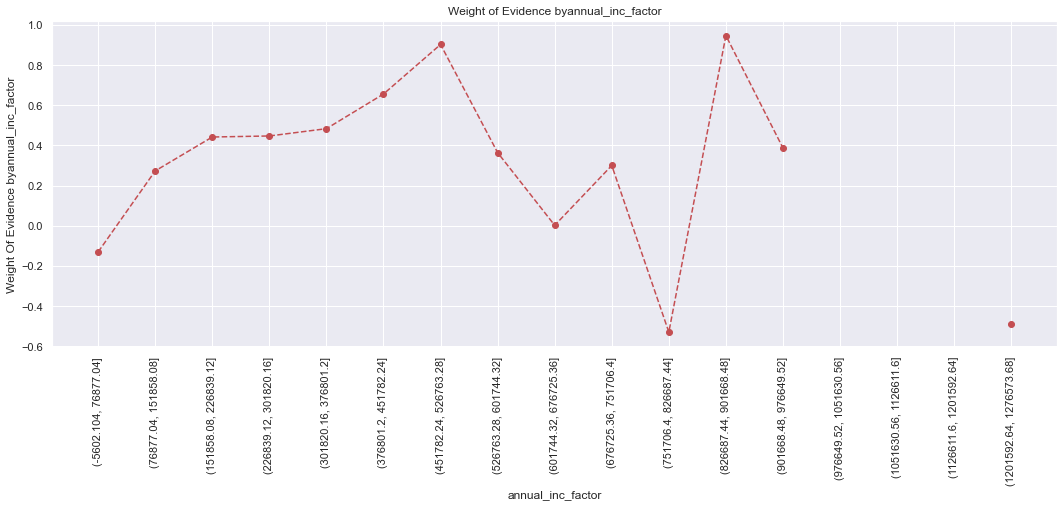

In [123]:
plot_by_woe(df_temp, 90)
# We plot the weight of evidence values.

In [124]:
# WoE is monotonically decreasing with income, so we split income in 10 equal categories, each with width of 15k.
df_inputs_prepr['annual_inc:<20K'] = np.where((df_inputs_prepr['annual_inc'] <= 20000), 1, 0)
df_inputs_prepr['annual_inc:20K-30K'] = np.where((df_inputs_prepr['annual_inc'] > 20000) & (df_inputs_prepr['annual_inc'] <= 30000), 1, 0)
df_inputs_prepr['annual_inc:30K-40K'] = np.where((df_inputs_prepr['annual_inc'] > 30000) & (df_inputs_prepr['annual_inc'] <= 40000), 1, 0)
df_inputs_prepr['annual_inc:40K-50K'] = np.where((df_inputs_prepr['annual_inc'] > 40000) & (df_inputs_prepr['annual_inc'] <= 50000), 1, 0)
df_inputs_prepr['annual_inc:50K-60K'] = np.where((df_inputs_prepr['annual_inc'] > 50000) & (df_inputs_prepr['annual_inc'] <= 60000), 1, 0)
df_inputs_prepr['annual_inc:60K-70K'] = np.where((df_inputs_prepr['annual_inc'] > 60000) & (df_inputs_prepr['annual_inc'] <= 70000), 1, 0)
df_inputs_prepr['annual_inc:70K-80K'] = np.where((df_inputs_prepr['annual_inc'] > 70000) & (df_inputs_prepr['annual_inc'] <= 80000), 1, 0)
df_inputs_prepr['annual_inc:80K-90K'] = np.where((df_inputs_prepr['annual_inc'] > 80000) & (df_inputs_prepr['annual_inc'] <= 90000), 1, 0)
df_inputs_prepr['annual_inc:90K-100K'] = np.where((df_inputs_prepr['annual_inc'] > 90000) & (df_inputs_prepr['annual_inc'] <= 100000), 1, 0)
df_inputs_prepr['annual_inc:100K-120K'] = np.where((df_inputs_prepr['annual_inc'] > 100000) & (df_inputs_prepr['annual_inc'] <= 120000), 1, 0)
df_inputs_prepr['annual_inc:120K-140K'] = np.where((df_inputs_prepr['annual_inc'] > 120000) & (df_inputs_prepr['annual_inc'] <= 140000), 1, 0)
df_inputs_prepr['annual_inc:>140K'] = np.where((df_inputs_prepr['annual_inc'] > 140000), 1, 0)

In [ ]:
df_inputs_prepr['mths_']

In [127]:
# Categories: Missing, 0-3, 4-30, 31-56, >=57
df_inputs_prepr['mths_since_last_delinq:Missing'] = np.where((df_inputs_prepr['mths_since_last_delinq'].isnull()), 1, 0)
df_inputs_prepr['mths_since_last_delinq:0-3'] = np.where((df_inputs_prepr['mths_since_last_delinq'] >= 0) & (df_inputs_prepr['mths_since_last_delinq'] <= 3), 1, 0)
df_inputs_prepr['mths_since_last_delinq:4-30'] = np.where((df_inputs_prepr['mths_since_last_delinq'] >= 4) & (df_inputs_prepr['mths_since_last_delinq'] <= 30), 1, 0)
df_inputs_prepr['mths_since_last_delinq:31-56'] = np.where((df_inputs_prepr['mths_since_last_delinq'] >= 31) & (df_inputs_prepr['mths_since_last_delinq'] <= 56), 1, 0)
df_inputs_prepr['mths_since_last_delinq:>=57'] = np.where((df_inputs_prepr['mths_since_last_delinq'] >= 57), 1, 0)

In [128]:
# dti
df_inputs_prepr['dti_factor'] = pd.cut(df_inputs_prepr['dti'], 100)
# Here we do fine-classing: using the 'cut' method, we split the variable into 100 categories by its values.
df_temp = woe_ordered_continous(df_inputs_prepr, 'dti_factor', df_targets_prepr)
# We calculate weight of evidence.
df_temp

,dti_factor,n_obj,prop_good,prop_n_obj,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-0.04, 0.4]",932,0.879828,0.001999,820.0,112.0,0.001974,0.002197,-0.107039,NaN,NaN,0.0285
1,"(0.4, 0.8]",992,0.912298,0.002127,905.0,87.0,0.002179,0.001707,0.244183,0.032470,0.351221,0.0285
2,"(0.8, 1.2]",1145,0.896070,0.002456,1026.0,119.0,0.002470,0.002335,0.056455,0.016229,0.187727,0.0285
3,"(1.2, 1.6]",1298,0.898305,0.002784,1166.0,132.0,0.002807,0.002590,0.080688,0.002235,0.024233,0.0285
4,"(1.6, 2.0]",1487,0.900471,0.003189,1339.0,148.0,0.003224,0.002904,0.104622,0.002166,0.023934,0.0285
5,"(2.0, 2.399]",1661,0.916315,0.003562,1522.0,139.0,0.003665,0.002727,0.295463,0.015845,0.190841,0.0285
6,"(2.399, 2.799]",1904,0.916492,0.004083,1745.0,159.0,0.004202,0.003120,0.297762,0.000176,0.002299,0.0285
7,"(2.799, 3.199]",2138,0.905051,0.004585,1935.0,203.0,0.004659,0.003983,0.156813,0.011440,0.140949,0.0285
8,"(3.199, 3.599]",2411,0.907092,0.005171,2187.0,224.0,0.005266,0.004395,0.180796,0.002041,0.023983,0.0285
9,"(3.599, 3.999]",2760,0.911957,0.005919,2517.0,243.0,0.006060,0.004768,0.239917,0.004864,0.059122,0.0285


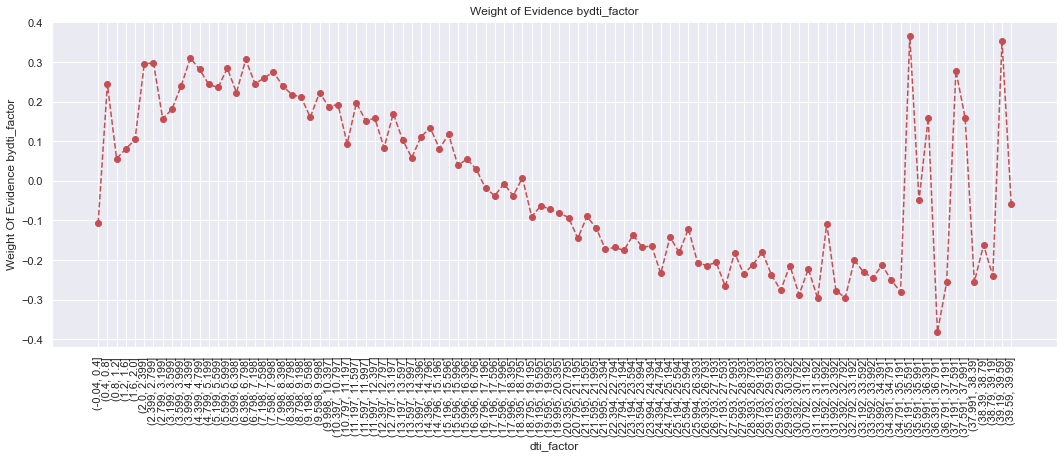

In [129]:
plot_by_woe(df_temp, 90)
# We plot the weight of evidence values.

In [130]:
# Similarly to income, initial examination shows that most values are lower than 200.
# Hence, we are going to have one category for more than 35, and we are going to apply our approach to determine
# the categories of everyone with 150k or less.
df_inputs_prepr_temp = df_inputs_prepr.loc[df_inputs_prepr['dti'] <= 35, : ]

In [132]:
df_inputs_prepr_temp['dti_factor'] = pd.cut(df_inputs_prepr_temp['dti'], 50)
# Here we do fine-classing: using the 'cut' method, we split the variable into 50 categories by its values.
df_temp = woe_ordered_continous(df_inputs_prepr_temp, 'dti_factor', df_targets_prepr[df_inputs_prepr_temp.index])
# We calculate weight of evidence.
df_temp

C:\Users\HP\AppData\Local\Temp/ipykernel_8376/3421042485.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inputs_prepr_temp['dti_factor'] = pd.cut(df_inputs_prepr_temp['dti'], 50)


,dti_factor,n_obj,prop_good,prop_n_obj,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-0.04, 0.4]",932,0.879828,0.001999,820.0,112.0,0.001974,0.002197,-0.107039,NaN,NaN,0.0285
1,"(0.4, 0.8]",992,0.912298,0.002127,905.0,87.0,0.002179,0.001707,0.244183,0.032470,0.351221,0.0285
2,"(0.8, 1.2]",1145,0.896070,0.002456,1026.0,119.0,0.002470,0.002335,0.056455,0.016229,0.187727,0.0285
3,"(1.2, 1.6]",1298,0.898305,0.002784,1166.0,132.0,0.002807,0.002590,0.080688,0.002235,0.024233,0.0285
4,"(1.6, 2.0]",1487,0.900471,0.003189,1339.0,148.0,0.003224,0.002904,0.104622,0.002166,0.023934,0.0285
5,"(2.0, 2.399]",1661,0.916315,0.003562,1522.0,139.0,0.003665,0.002727,0.295463,0.015845,0.190841,0.0285
6,"(2.399, 2.799]",1904,0.916492,0.004083,1745.0,159.0,0.004202,0.003120,0.297762,0.000176,0.002299,0.0285
7,"(2.799, 3.199]",2138,0.905051,0.004585,1935.0,203.0,0.004659,0.003983,0.156813,0.011440,0.140949,0.0285
8,"(3.199, 3.599]",2411,0.907092,0.005171,2187.0,224.0,0.005266,0.004395,0.180796,0.002041,0.023983,0.0285
9,"(3.599, 3.999]",2760,0.911957,0.005919,2517.0,243.0,0.006060,0.004768,0.239917,0.004864,0.059122,0.0285


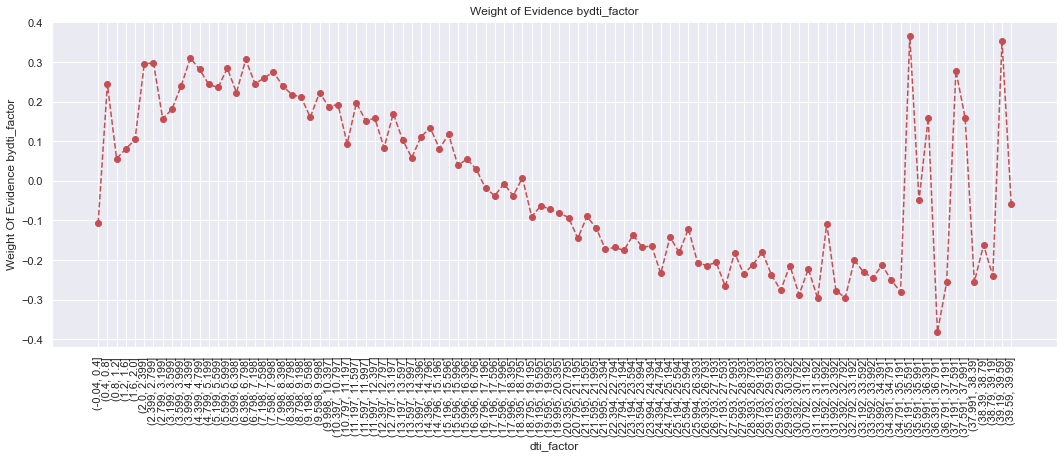

In [133]:
plot_by_woe(df_temp, 90)
# We plot the weight of evidence values.

In [134]:
# Categories:
df_inputs_prepr['dti:<=1.4'] = np.where((df_inputs_prepr['dti'] <= 1.4), 1, 0)
df_inputs_prepr['dti:1.4-3.5'] = np.where((df_inputs_prepr['dti'] > 1.4) & (df_inputs_prepr['dti'] <= 3.5), 1, 0)
df_inputs_prepr['dti:3.5-7.7'] = np.where((df_inputs_prepr['dti'] > 3.5) & (df_inputs_prepr['dti'] <= 7.7), 1, 0)
df_inputs_prepr['dti:7.7-10.5'] = np.where((df_inputs_prepr['dti'] > 7.7) & (df_inputs_prepr['dti'] <= 10.5), 1, 0)
df_inputs_prepr['dti:10.5-16.1'] = np.where((df_inputs_prepr['dti'] > 10.5) & (df_inputs_prepr['dti'] <= 16.1), 1, 0)
df_inputs_prepr['dti:16.1-20.3'] = np.where((df_inputs_prepr['dti'] > 16.1) & (df_inputs_prepr['dti'] <= 20.3), 1, 0)
df_inputs_prepr['dti:20.3-21.7'] = np.where((df_inputs_prepr['dti'] > 20.3) & (df_inputs_prepr['dti'] <= 21.7), 1, 0)
df_inputs_prepr['dti:21.7-22.4'] = np.where((df_inputs_prepr['dti'] > 21.7) & (df_inputs_prepr['dti'] <= 22.4), 1, 0)
df_inputs_prepr['dti:22.4-35'] = np.where((df_inputs_prepr['dti'] > 22.4) & (df_inputs_prepr['dti'] <= 35), 1, 0)
df_inputs_prepr['dti:>35'] = np.where((df_inputs_prepr['dti'] > 35), 1, 0)

In [ ]:
df_inputs_prepr['mths_since_last_record']

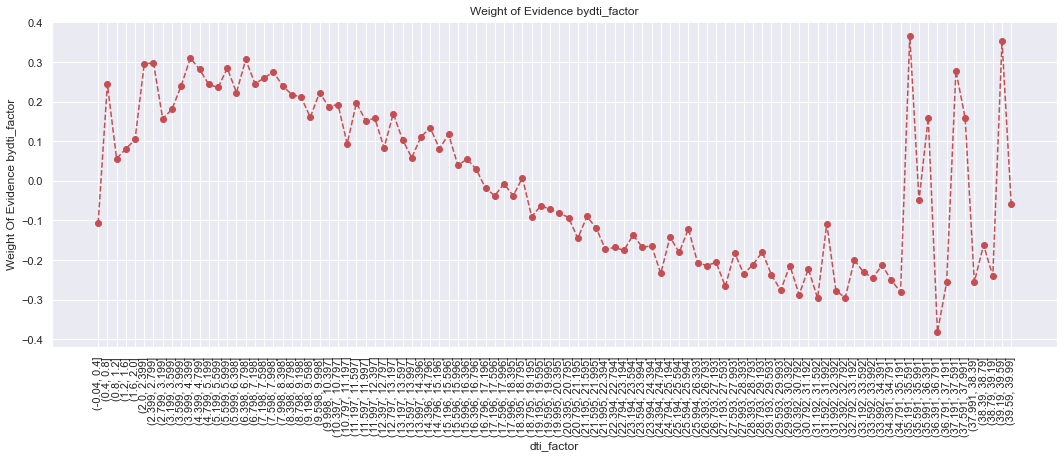

In [132]:
plot_by_woe(df_temp, 90)
# We plot the weight of evidence values.

In [137]:
 # Categories: 'Missing', '0-2', '3-20', '21-31', '32-80', '81-86', '>86'
df_inputs_prepr['mths_since_last_record:Missing'] = np.where((df_inputs_prepr['mths_since_last_record'].isnull()), 1, 0)
df_inputs_prepr['mths_since_last_record:0-2'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 0) & (df_inputs_prepr['mths_since_last_record'] <= 2), 1, 0)
df_inputs_prepr['mths_since_last_record:3-20'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 3) & (df_inputs_prepr['mths_since_last_record'] <= 20), 1, 0)
df_inputs_prepr['mths_since_last_record:21-31'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 21) & (df_inputs_prepr['mths_since_last_record'] <= 31), 1, 0)
df_inputs_prepr['mths_since_last_record:32-80'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 32) & (df_inputs_prepr['mths_since_last_record'] <= 80), 1, 0)
df_inputs_prepr['mths_since_last_record:81-86'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 81) & (df_inputs_prepr['mths_since_last_record'] <= 86), 1, 0)
df_inputs_prepr['mths_since_last_record:>86'] = np.where((df_inputs_prepr['mths_since_last_record'] > 86), 1, 0)

In [138]:
#train test split
from sklearn.model_selection import train_test_split
loan_data_inputs_train,loan_data_inputs_test,loan_data_targets_train,loan_data_targets_test=train_test_split(df_inputs_prepr,df_targets_prepr,test_size=0.2,random_state=272)


In [140]:
#make csv files for each train and test set
loan_data_inputs_train.to_csv("loan_data_inputs_train.csv")
loan_data_inputs_test.to_csv("loan_data_inputs_test.csv")
loan_data_targets_train.to_csv("loan_data_targets_train.csv")
loan_data_targets_test.to_csv("loan_data_targets_test.csv")